<a href="https://colab.research.google.com/github/CepharsBonacci/DEEP_LEARNING_PROJECTS_/blob/main/Sarimax_oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import math

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import os
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/RMB FINALE/6SeptemberUpdate.zip', 'r') as file:
  file.extractall('/content/drive/MyDrive/RMB FINALE/6SeptemberUpdate/cpi.csv')

In [4]:
path='/content/drive/MyDrive/RMB FINALE/6SeptemberUpdate/cpi.csv/CPI_Historic_Values_Zindi_Latest.csv'
cpi=pd.read_csv(path)
vehicles_path='/content/drive/MyDrive/RMB FINALE/Naamsa_Vehicle_Sales.csv'
vehicles=pd.read_csv(vehicles_path)
currency_path="/content/drive/MyDrive/RMB FINALE/currency_data.csv"
currency=pd.read_csv(currency_path)
pmi_path='/content/drive/MyDrive/RMB FINALE/PMI.csv'
pmi=pd.read_csv(pmi_path)
absalom_path="/content/drive/MyDrive/RMB FINALE/absalom.csv"
absalom=pd.read_csv(absalom_path)

In [5]:
absalom.head()

Month  Business Activity  New Sales Orders  Backlog of Sales Orders  \
0  2022-01-31               46.3              50.9                     35.8   
1  2022-02-28               60.2              56.3                     44.5   
2  2022-03-31               58.2              57.1                     41.8   
3  2022-04-30               35.8              40.6                     40.6   
4  2022-05-31               50.0              56.3                     41.9   

   Inventories  Suppliers Performance  Prices  Employment  \
0         55.6                   33.3    88.9        47.2   
1         61.9                   35.7    89.8        50.8   
2         63.3                   31.6    95.9        49.0   
3         51.9                   35.8    89.6        49.0   
4         57.0                   39.1    88.1        50.0   

   Purchasing Commitments  Exp. Business Conditions   PMI  
0                    56.5                      71.3  53.3  
1                    58.6                      69.5  58.7  
2                    58.2                      55.1  59.2  
3                    50.0                      55.7  48.3  
4                    53.1                      63.3  54.9

In [6]:
absalom.columns

Index(['Month', 'Business Activity', 'New Sales Orders',
       'Backlog of Sales Orders', 'Inventories', 'Suppliers Performance',
       'Prices', 'Employment', 'Purchasing Commitments',
       'Exp. Business Conditions', 'PMI'],
      dtype='object')

In [7]:
new_row = ["2023-09-30", 44.2, 38.7, 36.3, 45.2, 40.3, 67.2, 45.2, 48.4, 55.6, 46.6]

new_df = pd.DataFrame([new_row], columns=absalom.columns)

absalom = pd.concat([absalom, new_df], ignore_index=True)
absalom

Month  Business Activity  New Sales Orders  Backlog of Sales Orders  \
0   2022-01-31               46.3              50.9                     35.8   
1   2022-02-28               60.2              56.3                     44.5   
2   2022-03-31               58.2              57.1                     41.8   
3   2022-04-30               35.8              40.6                     40.6   
4   2022-05-31               50.0              56.3                     41.9   
5   2022-06-30               41.7              41.8                     39.9   
6   2022-07-31               41.6              34.9                     37.0   
7   2022-08-31               50.6              50.0                     38.3   
8   2022-09-30               42.0              43.7                     38.1   
9   2022-10-31               56.5              55.8                     44.4   
10  2022-11-30               61.0              65.5                     40.7   
11  2022-12-31               39.2              47.1                     42.3   
12  2023-01-31               45.7              45.0                     37.1   
13  2023-02-28               46.8              48.4                     46.8   
14  2023-03-31               47.6              46.9                     38.9   
15  2023-04-30               39.4              38.5                     36.5   
16  2023-05-31               49.2              48.4                     37.9   
17  2023-06-30               45.1              41.1                     37.9   
18  2023-07-31               39.2              39.2                     31.5   
19  2023-08-31               52.9              50.0                     39.1   
20  2023-09-30               44.2              38.7                     36.3   

    Inventories  Suppliers Performance  Prices  Employment  \
0          55.6                   33.3    88.9        47.2   
1          61.9                   35.7    89.8        50.8   
2          63.3                   31.6    95.9        49.0   
3          51.9                   35.8    89.6        49.0   
4          57.0                   39.1    88.1        50.0   
5          48.1                   31.6    89.8        46.6   
6          57.3                   44.0    87.5        44.8   
7          55.5                   43.9    81.3        47.5   
8          54.3                   40.6    79.0        48.1   
9          54.8                   37.9    75.4        46.0   
10         57.6                   38.1    75.9        51.7   
11         46.2                   34.3    64.4        53.8   
12         50.0                   42.0    69.3        47.1   
13         48.4                   47.6    78.6        48.4   
14         50.0                   44.3    78.1        44.5   
15         53.9                   46.2    75.0        43.3   
16         48.4                   42.9    77.0        45.2   
17         43.5                   46.0    71.3        43.5   
18         46.9                   45.3    64.8        43.8   
19         50.0                   41.7    65.9        42.0   
20         45.2                   40.3    67.2        45.2   

    Purchasing Commitments  Exp. Business Conditions   PMI  
0                     56.5                      71.3  53.3  
1                     58.6                      69.5  58.7  
2                     58.2                      55.1  59.2  
3                     50.0                      55.7  48.3  
4                     53.1                      63.3  54.9  
5                     45.7                      53.8  49.3  
6                     45.4                      49.4  46.9  
7                     54.9                      57.9  51.9  
8                     50.0                      51.2  49.5  
9                     48.4                      49.2  55.0  
10                    53.4                      51.7  59.5  
11                    45.1                      54.9  50.4  
12                    48.6                      63.8  49.2  
13                    41.3   

In [8]:
cpi_pivot=cpi.pivot(index='Month',columns='Category',values='Value').reset_index()
cpi_pivot['Month']=pd.to_datetime(cpi_pivot['Month'])
cpi_pivot=cpi_pivot.sort_values('Month').reset_index(drop=True)
cpi_pivot.head()

Category      Month  Alcoholic beverages and tobacco  Clothing and footwear  \
0        2022-01-31                            100.0                  100.2   
1        2022-02-28                            100.6                  100.3   
2        2022-03-31                            102.8                  100.5   
3        2022-04-30                            103.6                  100.7   
4        2022-05-31                            104.4                  100.9   

Category  Communication  Education  Food and non-alcoholic beverages  \
0                  99.8      100.0                             100.9   
1                  99.7      100.0                             101.8   
2                  99.7      104.4                             102.4   
3                  99.6      104.4                             103.1   
4                  99.9      104.4                             105.3   

Category  Headline_CPI  Health  Household contents and services  \
0                100.2   100.1                            100.4   
1                100.8   103.2                            100.4   
2                101.8   103.7                            100.8   
3                102.4   104.0                            101.1   
4                103.1   104.3                            101.8   

Category  Housing and utilities  Miscellaneous goods and services  \
0                         100.0                             100.6   
1                         100.1                             101.5   
2                         100.5                             101.9   
3                         100.5                             102.8   
4                         100.6                             102.9   

Category  Recreation and culture  Restaurants and hotels   Transport  
0                          100.2                    101.2       98.9  
1                          100.3                    101.9      100.6  
2                          100.4                    103.0      103.7  
3                          100.7                    103.3      105.1  
4                          101.0                    103.8      105.9

In [9]:
date_str = '2023-08-31'
date_obj=pd.to_datetime(date_str)
new_row=pd.DataFrame({'Month': [date_obj]})
cpi_pivot=pd.concat([cpi_pivot,new_row]).reset_index(drop=True)
cpi_pivot.head()

Month  Alcoholic beverages and tobacco  Clothing and footwear  \
0 2022-01-31                            100.0                  100.2   
1 2022-02-28                            100.6                  100.3   
2 2022-03-31                            102.8                  100.5   
3 2022-04-30                            103.6                  100.7   
4 2022-05-31                            104.4                  100.9   

   Communication  Education  Food and non-alcoholic beverages  Headline_CPI  \
0           99.8      100.0                             100.9         100.2   
1           99.7      100.0                             101.8         100.8   
2           99.7      104.4                             102.4         101.8   
3           99.6      104.4                             103.1         102.4   
4           99.9      104.4                             105.3         103.1   

   Health  Household contents and services  Housing and utilities  \
0   100.1                            100.4                  100.0   
1   103.2                            100.4                  100.1   
2   103.7                            100.8                  100.5   
3   104.0                            101.1                  100.5   
4   104.3                            101.8                  100.6   

   Miscellaneous goods and services  Recreation and culture  \
0                             100.6                   100.2   
1                             101.5                   100.3   
2                             101.9                   100.4   
3                             102.8                   100.7   
4                             102.9                   101.0   

   Restaurants and hotels   Transport  
0                    101.2       98.9  
1                    101.9      100.6  
2                    103.0      103.7  
3                    103.3      105.1  
4                    103.8      105.9

In [10]:
# Define the fill values
fill_values = {
    "Alcoholic beverages and tobacco": 111.2,
    "Clothing and footwear": 104.6,
    "Communication": 99.5,
    "Education": 110.4,
    "Food and non-alcoholic beverages": 118.5,
    "Headline_CPI": 111.1,
    "Health": 110.7,
    "Household contents and services": 108.1,
    "Housing and utilities": 108.9,
    "Miscellaneous goods and services": 109.9,
    "Recreation and culture": 105.8,
    "Restaurants and hotels ": 111.0,
    "Transport": 113.6
}

# Fill NaN values
cpi_pivot.fillna(fill_values, inplace=True)

In [11]:
absalom['Month'] = pd.to_datetime(absalom['Month'])

In [12]:
date_added='2023-09-30'
date_ob=pd.to_datetime(date_added)
new_row=pd.DataFrame({'Month' :[date_ob]})
cpi_pivot=pd.concat([cpi_pivot,new_row]).reset_index(drop=True)
cpi_pivot.head(3)

Month  Alcoholic beverages and tobacco  Clothing and footwear  \
0 2022-01-31                            100.0                  100.2   
1 2022-02-28                            100.6                  100.3   
2 2022-03-31                            102.8                  100.5   

   Communication  Education  Food and non-alcoholic beverages  Headline_CPI  \
0           99.8      100.0                             100.9         100.2   
1           99.7      100.0                             101.8         100.8   
2           99.7      104.4                             102.4         101.8   

   Health  Household contents and services  Housing and utilities  \
0   100.1                            100.4                  100.0   
1   103.2                            100.4                  100.1   
2   103.7                            100.8                  100.5   

   Miscellaneous goods and services  Recreation and culture  \
0                             100.6                   100.2   
1                             101.5                   100.3   
2                             101.9                   100.4   

   Restaurants and hotels   Transport  
0                    101.2       98.9  
1                    101.9      100.6  
2                    103.0      103.7

In [13]:
# Define the fill values
fill_values = {
    "Alcoholic beverages and tobacco": 111.1,
    "Clothing and footwear": 104.8,
    "Communication": 99.5,
    "Education": 110.4,
    "Food and non-alcoholic beverages": 119.2,
    "Headline_CPI": 111.8,
    "Health": 110.8,
    "Household contents and services": 108.8,
    "Housing and utilities": 109.4,
    "Miscellaneous goods and services": 110.0,
    "Recreation and culture": 106.3,
    "Restaurants and hotels ": 110.7,
    "Transport": 116.7
}

# Fill NaN values
cpi_pivot.fillna(fill_values, inplace=True)

In [14]:
date_added='2023-10-31'
date_object=pd.to_datetime(date_added)
new_row=pd.DataFrame({'Month': [date_object]})
cpi_pivot = pd.concat([cpi_pivot, new_row]).reset_index(drop=True)
cpi_pivot.head()

Month  Alcoholic beverages and tobacco  Clothing and footwear  \
0 2022-01-31                            100.0                  100.2   
1 2022-02-28                            100.6                  100.3   
2 2022-03-31                            102.8                  100.5   
3 2022-04-30                            103.6                  100.7   
4 2022-05-31                            104.4                  100.9   

   Communication  Education  Food and non-alcoholic beverages  Headline_CPI  \
0           99.8      100.0                             100.9         100.2   
1           99.7      100.0                             101.8         100.8   
2           99.7      104.4                             102.4         101.8   
3           99.6      104.4                             103.1         102.4   
4           99.9      104.4                             105.3         103.1   

   Health  Household contents and services  Housing and utilities  \
0   100.1                            100.4                  100.0   
1   103.2                            100.4                  100.1   
2   103.7                            100.8                  100.5   
3   104.0                            101.1                  100.5   
4   104.3                            101.8                  100.6   

   Miscellaneous goods and services  Recreation and culture  \
0                             100.6                   100.2   
1                             101.5                   100.3   
2                             101.9                   100.4   
3                             102.8                   100.7   
4                             102.9                   101.0   

   Restaurants and hotels   Transport  
0                    101.2       98.9  
1                    101.9      100.6  
2                    103.0      103.7  
3                    103.3      105.1  
4                    103.8      105.9

In [15]:
cpi_pivot.columns[1:].to_list()

['Alcoholic beverages and tobacco',
 'Clothing and footwear',
 'Communication',
 'Education',
 'Food and non-alcoholic beverages',
 'Headline_CPI',
 'Health',
 'Household contents and services',
 'Housing and utilities',
 'Miscellaneous goods and services',
 'Recreation and culture',
 'Restaurants and hotels ',
 'Transport']

In [16]:
cpi_pivot=pd.merge(cpi_pivot, absalom, on='Month', how='left')

In [17]:
lagged_fts=cpi_pivot.columns[1:].to_list()
for col in lagged_fts:
  for i in range(1,8):
    cpi_pivot[f"prev_{i}_month_{col}"]=cpi_pivot[col].shift(i)
cpi_pivot


Month  Alcoholic beverages and tobacco  Clothing and footwear  \
0  2022-01-31                            100.0                  100.2   
1  2022-02-28                            100.6                  100.3   
2  2022-03-31                            102.8                  100.5   
3  2022-04-30                            103.6                  100.7   
4  2022-05-31                            104.4                  100.9   
5  2022-06-30                            104.5                  101.3   
6  2022-07-31                            104.4                  101.6   
7  2022-08-31                            104.7                  102.1   
8  2022-09-30                            105.6                  102.5   
9  2022-10-31                            106.1                  102.6   
10 2022-11-30                            106.4                  102.6   
11 2022-12-31                            106.2                  102.8   
12 2023-01-31                            106.5                  102.9   
13 2023-02-28                            106.9                  103.5   
14 2023-03-31                            109.2                  103.4   
15 2023-04-30                            110.2                  103.7   
16 2023-05-31                            110.6                  104.1   
17 2023-06-30                            110.9                  104.3   
18 2023-07-31                            111.5                  104.5   
19 2023-08-31                            111.2                  104.6   
20 2023-09-30                            111.1                  104.8   
21 2023-10-31                              NaN                    NaN   

    Communication  Education  Food and non-alcoholic beverages  Headline_CPI  \
0            99.8      100.0                             100.9         100.2   
1            99.7      100.0                             101.8         100.8   
2            99.7      104.4                             102.4         101.8   
3            99.6      104.4                             103.1         102.4   
4            99.9      104.4                             105.3         103.1   
5           100.3      104.4                             106.6         104.2   
6            99.4      104.4                             107.8         105.8   
7           100.1      104.4                             109.7         106.0   
8            99.9      104.4                             110.3         106.1   
9            99.8      104.4                             111.3         106.5   
10           99.2      104.4                             111.9         106.8   
11           99.1      104.4                             112.4         107.2   
12           99.4      104.4                             114.4         107.1   
13           99.8      104.4                             115.6         107.9   
14           99.7      110.4                             116.7         109.0   
15           99.8      110.4                             117.4         109.4   
16           99.7      110.4                             117.7         109.6   
17           99.6      110.4                             118.3         109.8   
18           99.5      110.4                             118.5         110.8   
19           99.5      110.4                             118.5         111.1   
20           99.5      110.4                             119.2         111.8   
21            NaN        NaN                               NaN           NaN   

    Health  Household contents and services  Housing and utilities  \
0    100.1                            100.4                  100.0   
1    103.2                            100.4                  100.1   
2    103.7                            100.8                  100.5   
3    104.0                            101.1                  100.5   
4    104.3                            101.8                  100.6   
5    104.6                            103.0                  101.2 

In [18]:
cpi_pivot=cpi_pivot.drop(0)
cpi_pivot=cpi_pivot.bfill()

In [19]:
train=cpi_pivot[cpi_pivot['Month'] != "2023-10-31"]
test=cpi_pivot[cpi_pivot['Month'] == "2023-10-31"]

training_set=train[train['Month'] != "2023-09-30"]
validation_set=train[train['Month'] == "2023-09-30"]

train.shape,test.shape,training_set.shape,validation_set.shape

((20, 185), (1, 185), (19, 185), (1, 185))

In [20]:
# Modelling            (This are leatures to predict)
lagged_fts =['Alcoholic beverages and tobacco',
 'Clothing and footwear',
 'Communication',
 'Education',
 'Food and non-alcoholic beverages',
 'Headline_CPI',
 'Health',
 'Household contents and services',
 'Housing and utilities',
 'Miscellaneous goods and services',
 'Recreation and culture',
 'Restaurants and hotels ',
 'Transport']

In [21]:
# create a seperate linear regression for lagged_fts
target_columns=lagged_fts
features=[col for col in train.columns if col not in target_columns + ['Month']]
features

['Business Activity',
 'New Sales Orders',
 'Backlog of Sales Orders',
 'Inventories',
 'Suppliers Performance',
 'Prices',
 'Employment',
 'Purchasing Commitments',
 'Exp. Business Conditions',
 'PMI',
 'prev_1_month_Alcoholic beverages and tobacco',
 'prev_2_month_Alcoholic beverages and tobacco',
 'prev_3_month_Alcoholic beverages and tobacco',
 'prev_4_month_Alcoholic beverages and tobacco',
 'prev_5_month_Alcoholic beverages and tobacco',
 'prev_6_month_Alcoholic beverages and tobacco',
 'prev_7_month_Alcoholic beverages and tobacco',
 'prev_1_month_Clothing and footwear',
 'prev_2_month_Clothing and footwear',
 'prev_3_month_Clothing and footwear',
 'prev_4_month_Clothing and footwear',
 'prev_5_month_Clothing and footwear',
 'prev_6_month_Clothing and footwear',
 'prev_7_month_Clothing and footwear',
 'prev_1_month_Communication',
 'prev_2_month_Communication',
 'prev_3_month_Communication',
 'prev_4_month_Communication',
 'prev_5_month_Communication',
 'prev_6_month_Communicati

<Figure size 1200x400 with 0 Axes>

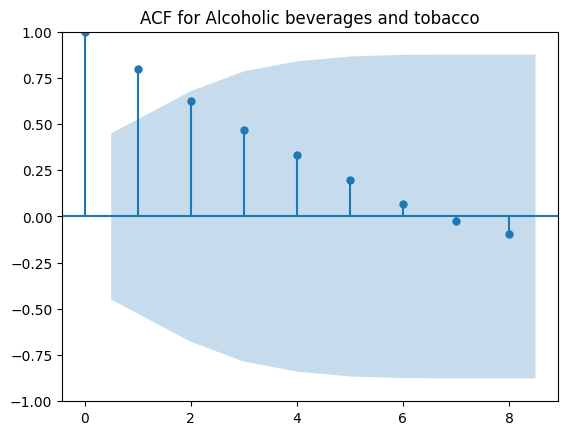

<Figure size 1200x400 with 0 Axes>

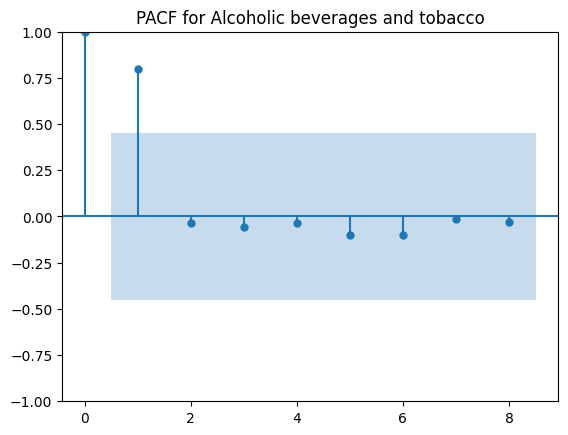

<Figure size 1200x400 with 0 Axes>

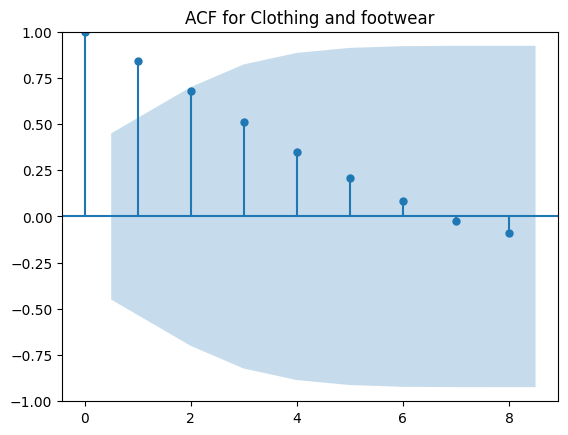

<Figure size 1200x400 with 0 Axes>

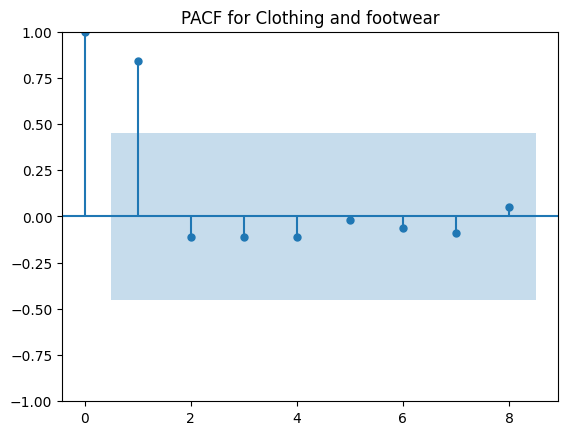

<Figure size 1200x400 with 0 Axes>

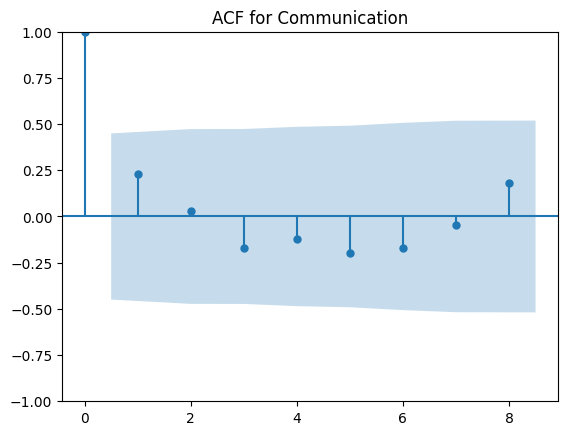

<Figure size 1200x400 with 0 Axes>

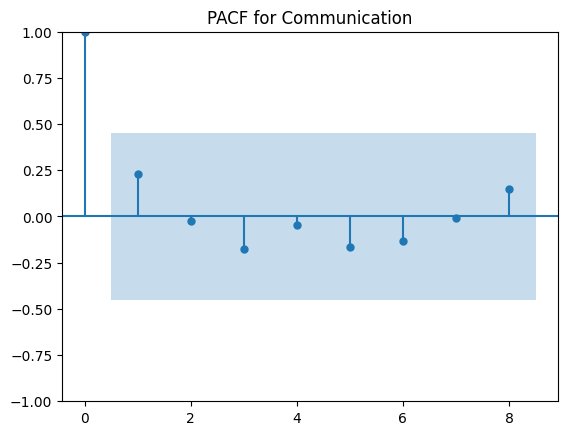

<Figure size 1200x400 with 0 Axes>

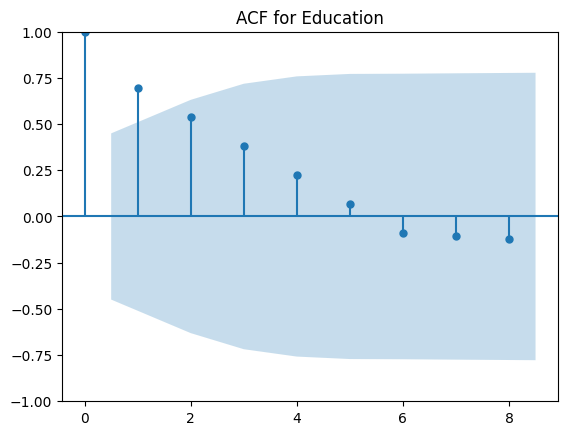

<Figure size 1200x400 with 0 Axes>

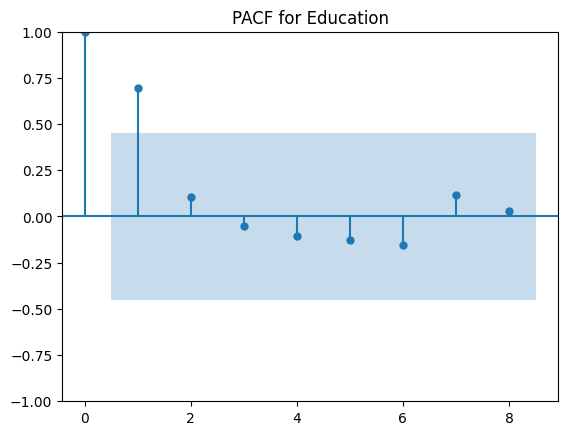

<Figure size 1200x400 with 0 Axes>

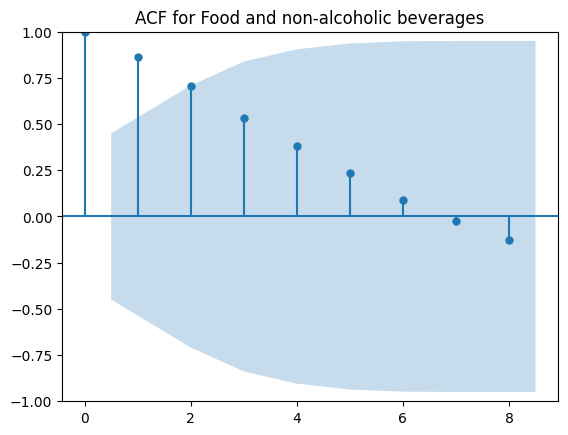

<Figure size 1200x400 with 0 Axes>

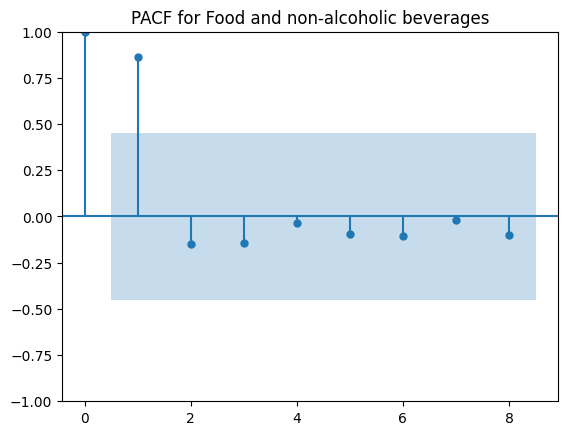

<Figure size 1200x400 with 0 Axes>

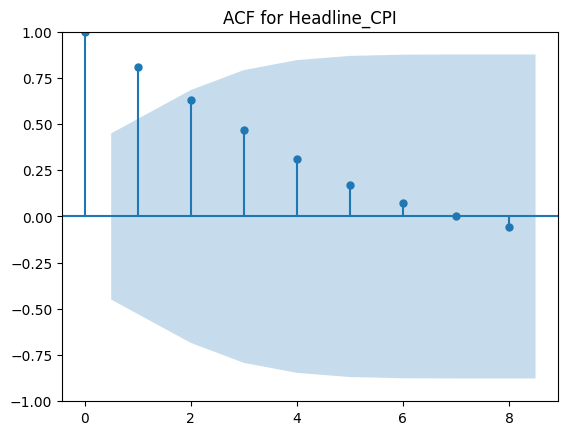

<Figure size 1200x400 with 0 Axes>

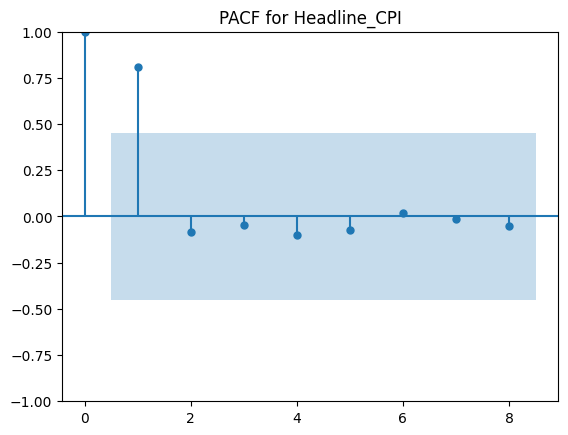

<Figure size 1200x400 with 0 Axes>

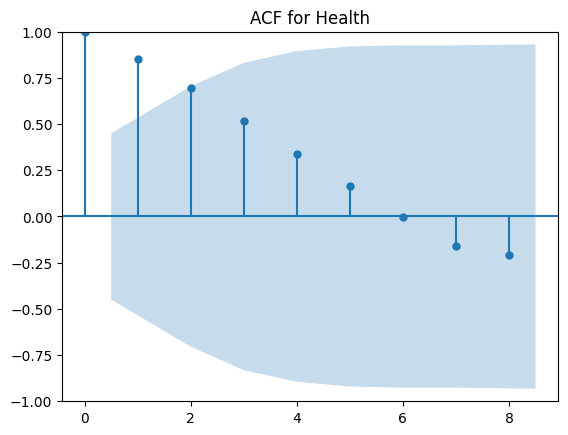

<Figure size 1200x400 with 0 Axes>

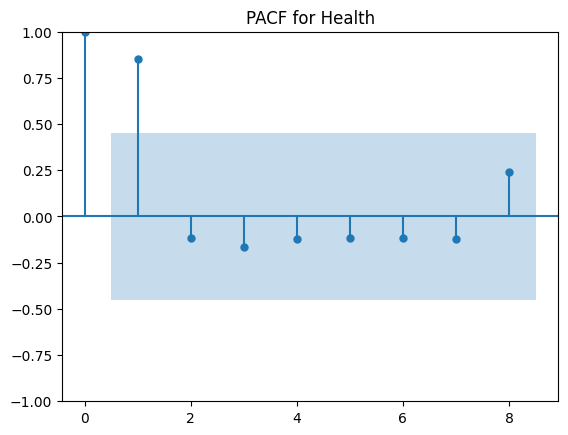

<Figure size 1200x400 with 0 Axes>

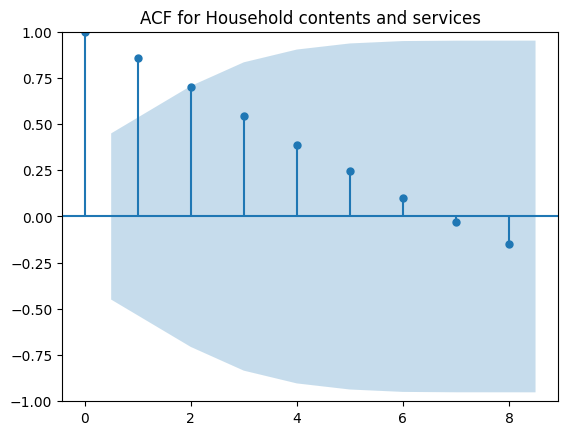

<Figure size 1200x400 with 0 Axes>

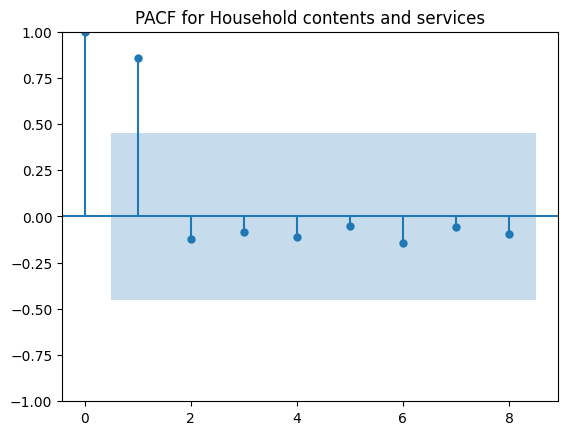

<Figure size 1200x400 with 0 Axes>

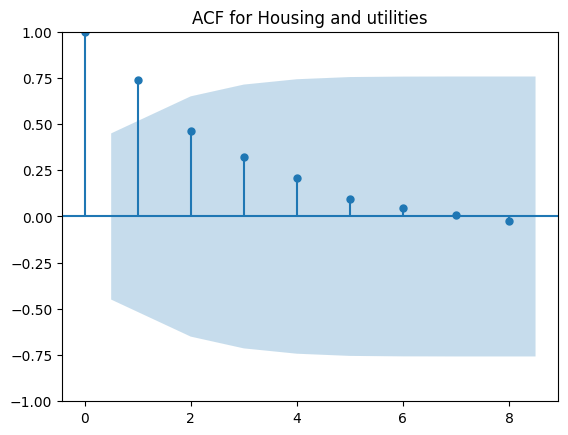

<Figure size 1200x400 with 0 Axes>

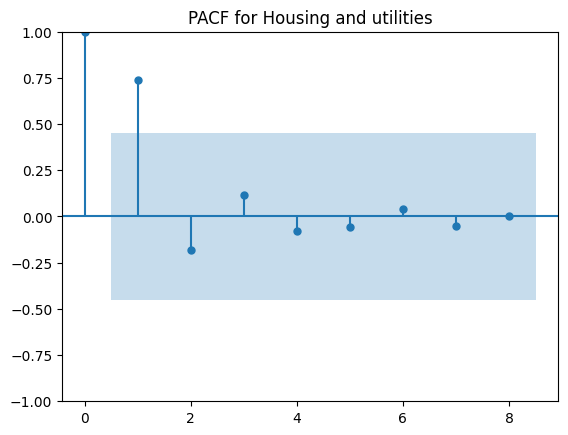

<Figure size 1200x400 with 0 Axes>

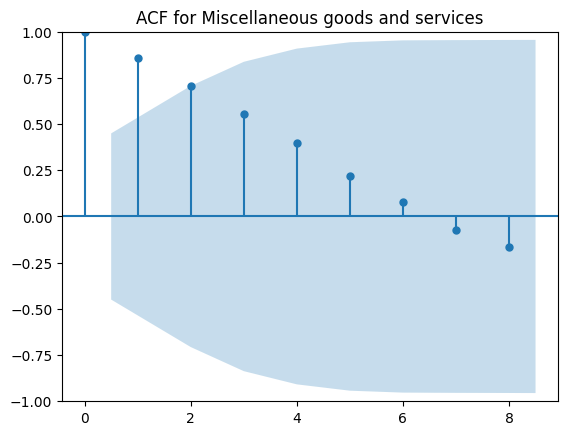

<Figure size 1200x400 with 0 Axes>

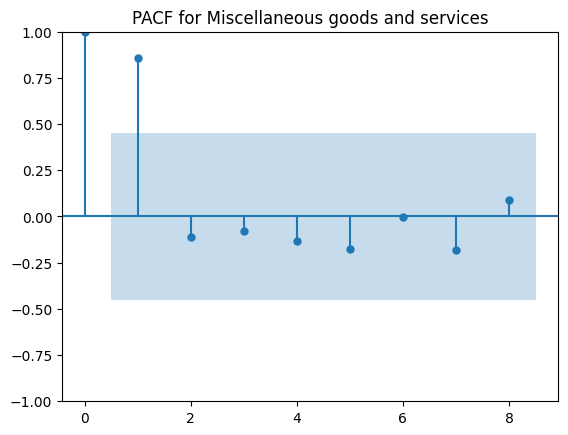

<Figure size 1200x400 with 0 Axes>

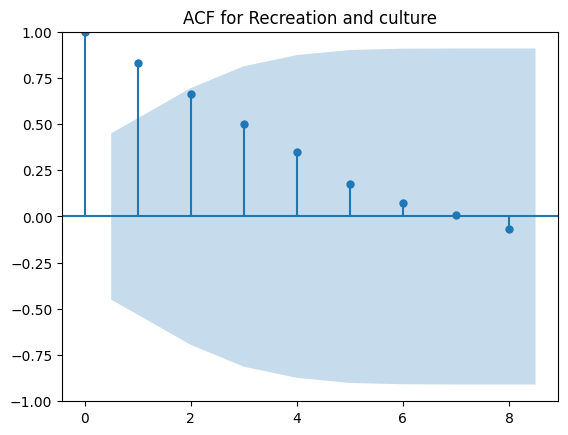

<Figure size 1200x400 with 0 Axes>

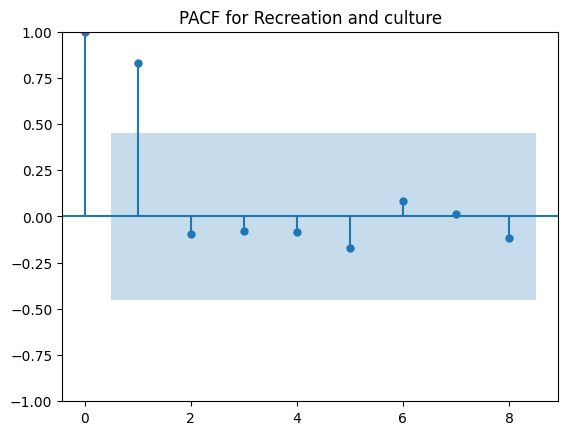

<Figure size 1200x400 with 0 Axes>

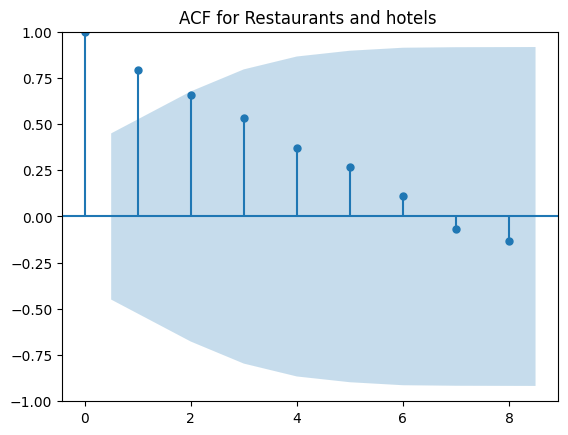

<Figure size 1200x400 with 0 Axes>

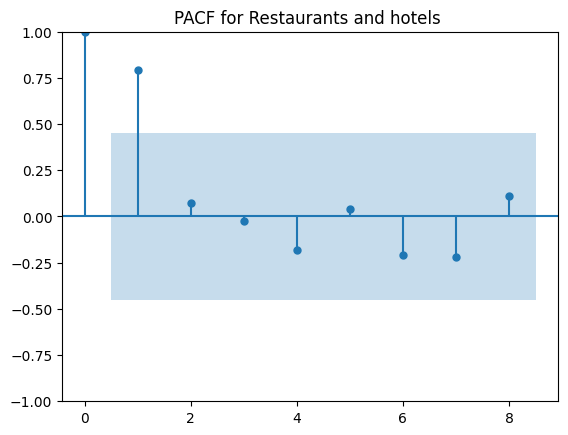

<Figure size 1200x400 with 0 Axes>

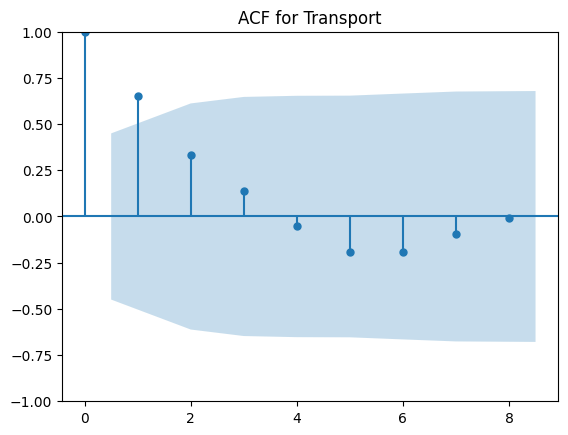

<Figure size 1200x400 with 0 Axes>

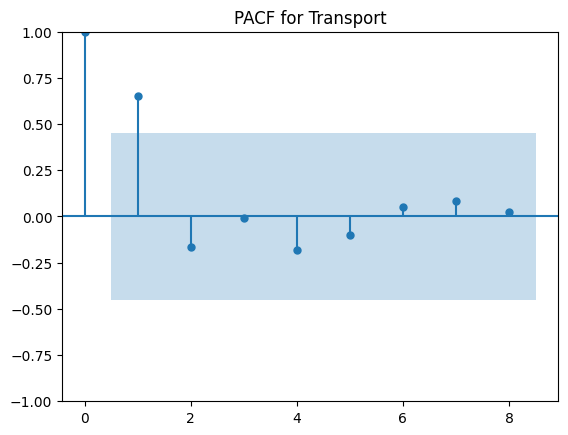

In [22]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Training and validation
X_train = training_set[features]
y_train = training_set[target_columns]

X_valid = validation_set[features]
y_valid = validation_set[target_columns]

# ACF and PACF plots
for target_col in target_columns:
    # Plot ACF
    plt.figure(figsize=(12, 4))
    plot_acf(y_train[target_col], lags=8, title=f'ACF for {target_col}')
    plt.show()

    # Plot PACF
    plt.figure(figsize=(12, 4))
    plot_pacf(y_train[target_col], lags=8, title=f'PACF for {target_col}')
    plt.show()

<Figure size 1200x400 with 0 Axes>

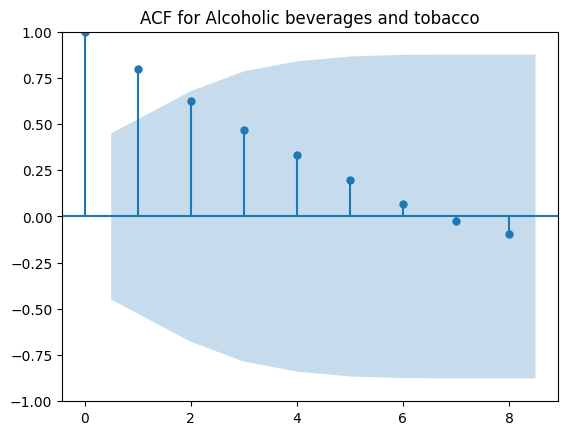

<Figure size 1200x400 with 0 Axes>

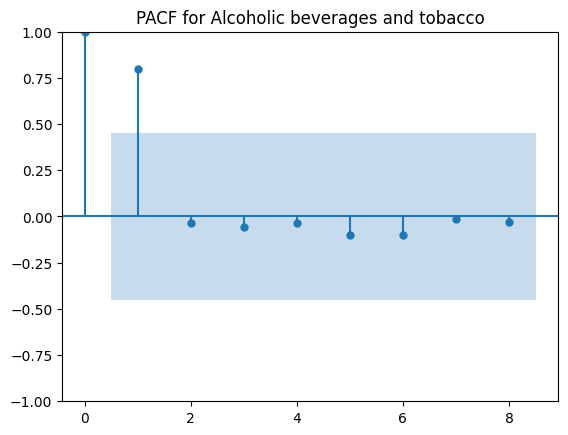

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


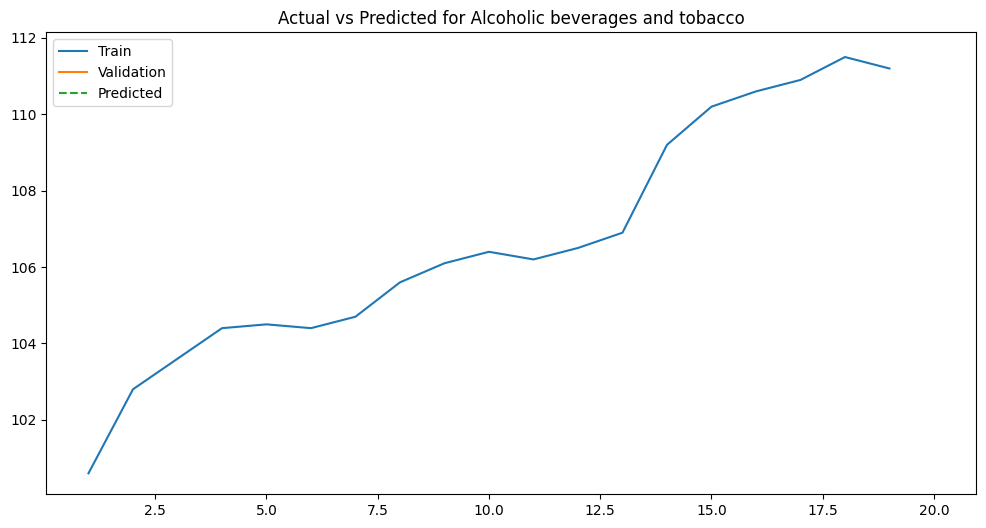

<Figure size 1200x400 with 0 Axes>

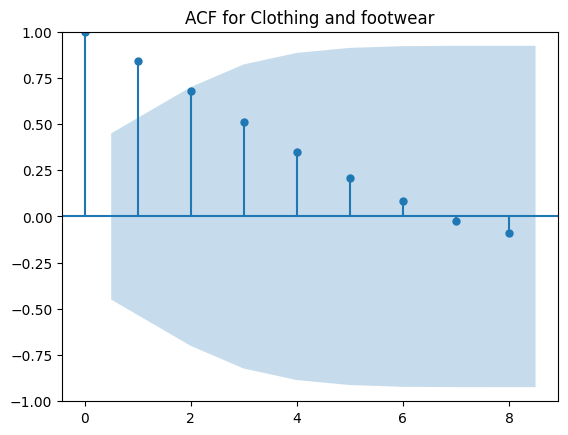

<Figure size 1200x400 with 0 Axes>

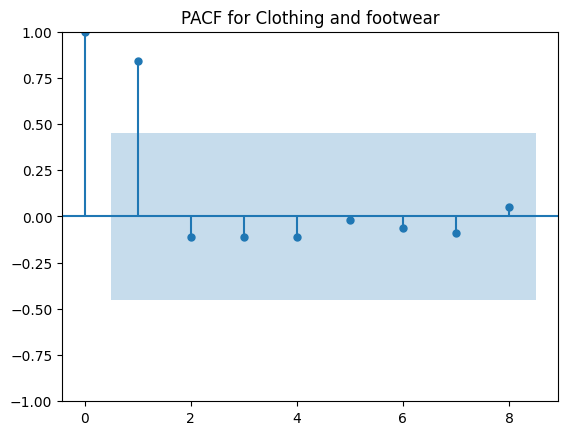

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


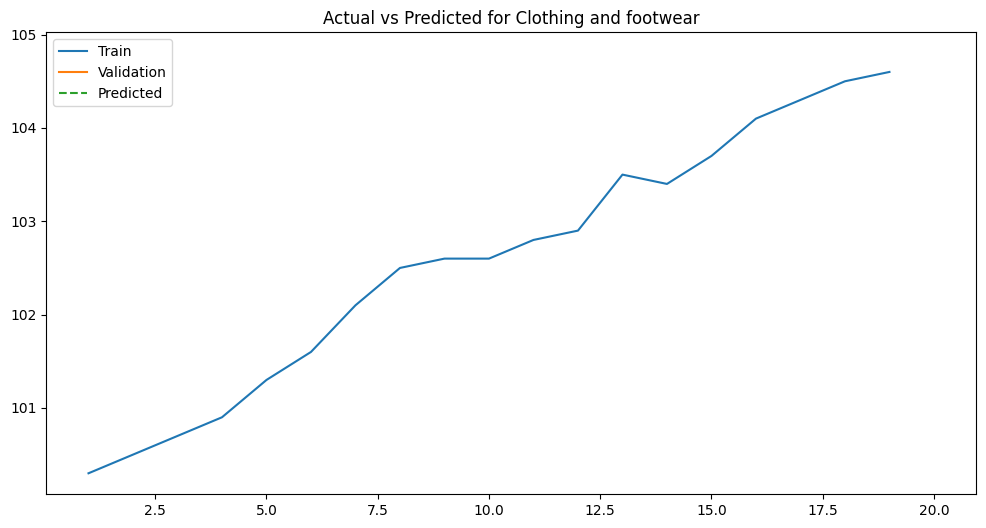

<Figure size 1200x400 with 0 Axes>

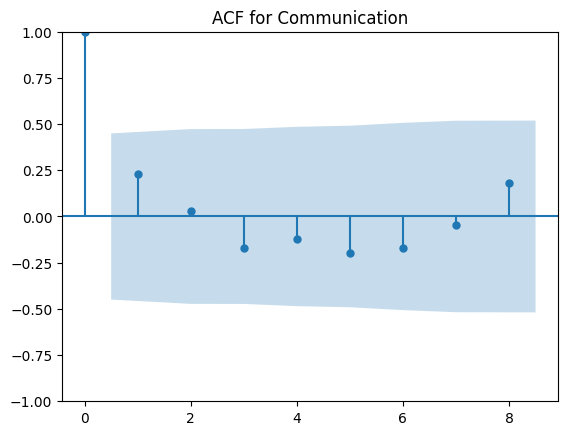

<Figure size 1200x400 with 0 Axes>

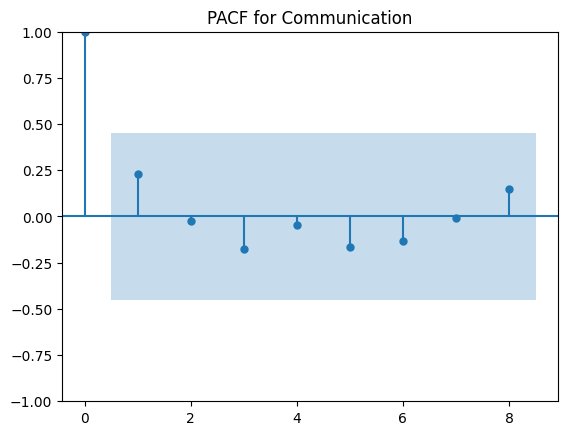

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


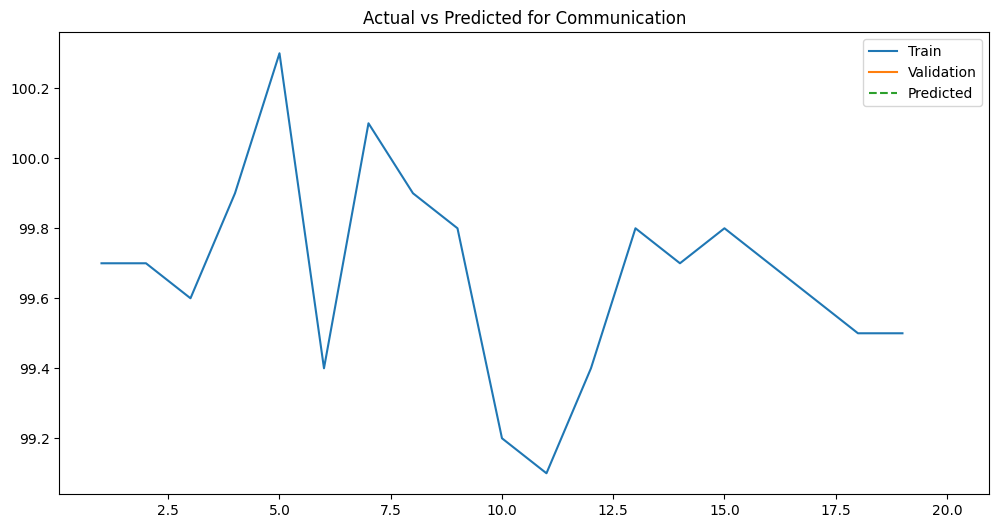

<Figure size 1200x400 with 0 Axes>

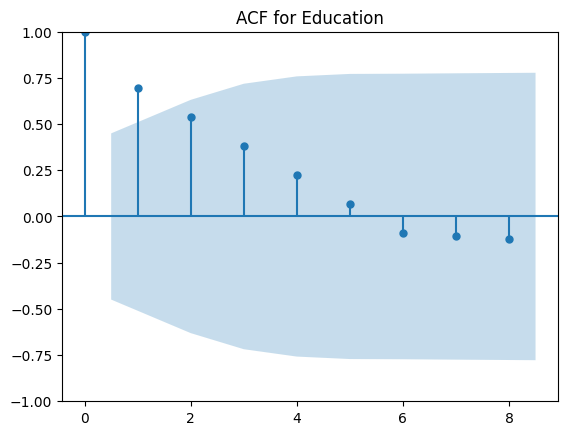

<Figure size 1200x400 with 0 Axes>

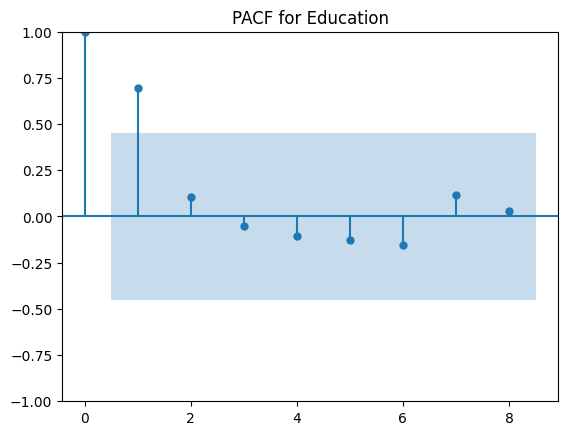

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


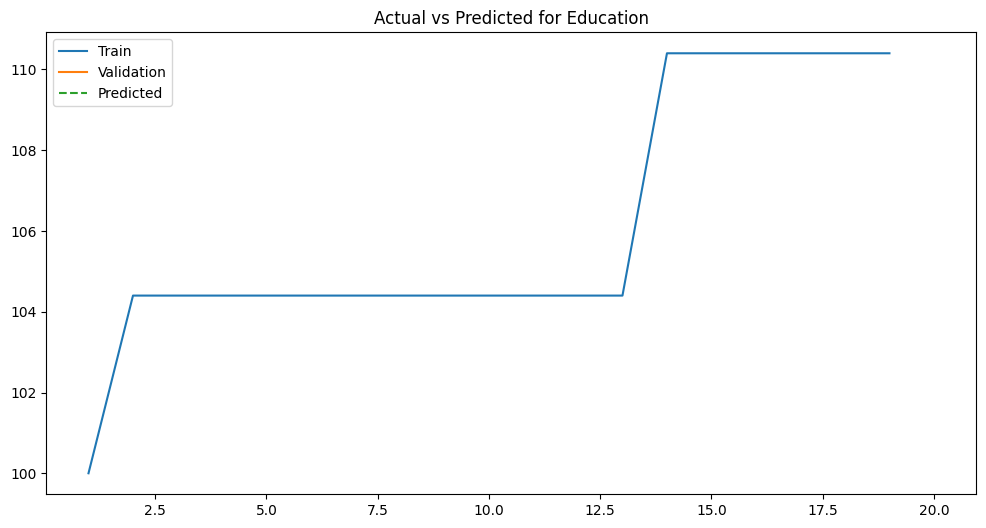

<Figure size 1200x400 with 0 Axes>

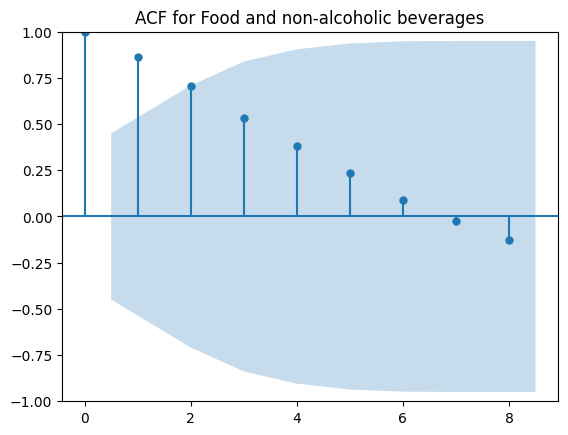

<Figure size 1200x400 with 0 Axes>

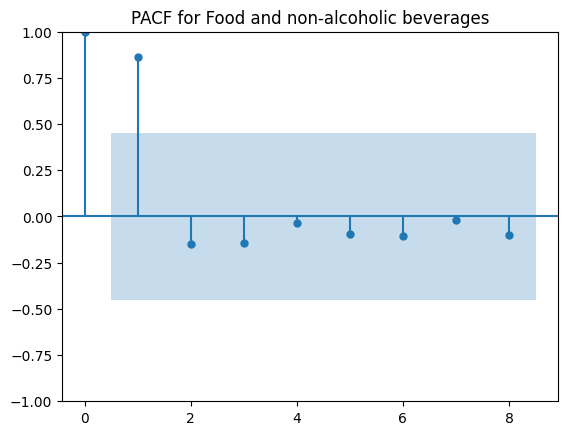

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


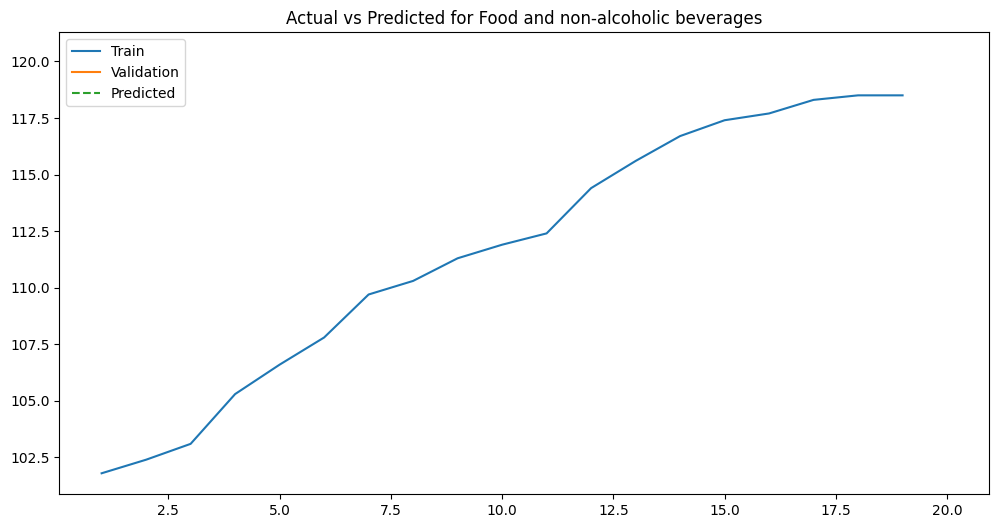

<Figure size 1200x400 with 0 Axes>

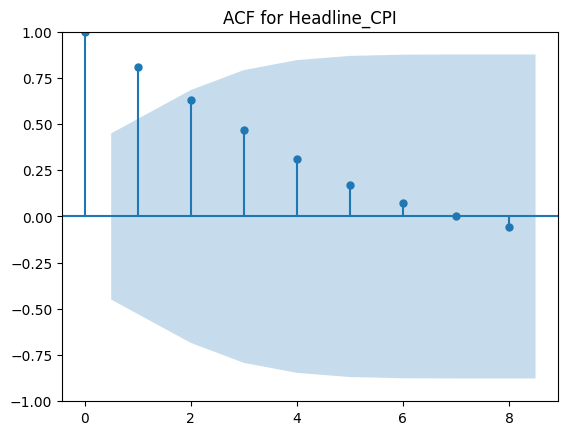

<Figure size 1200x400 with 0 Axes>

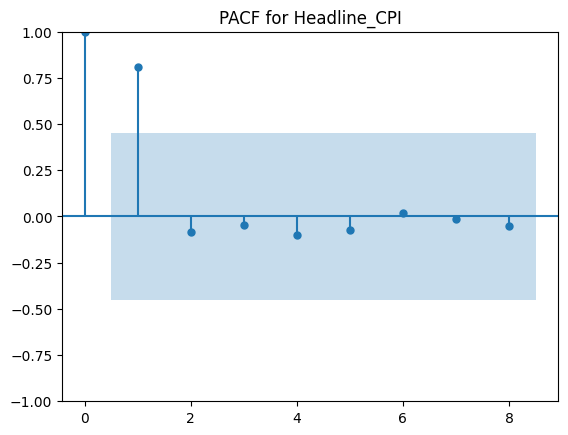

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


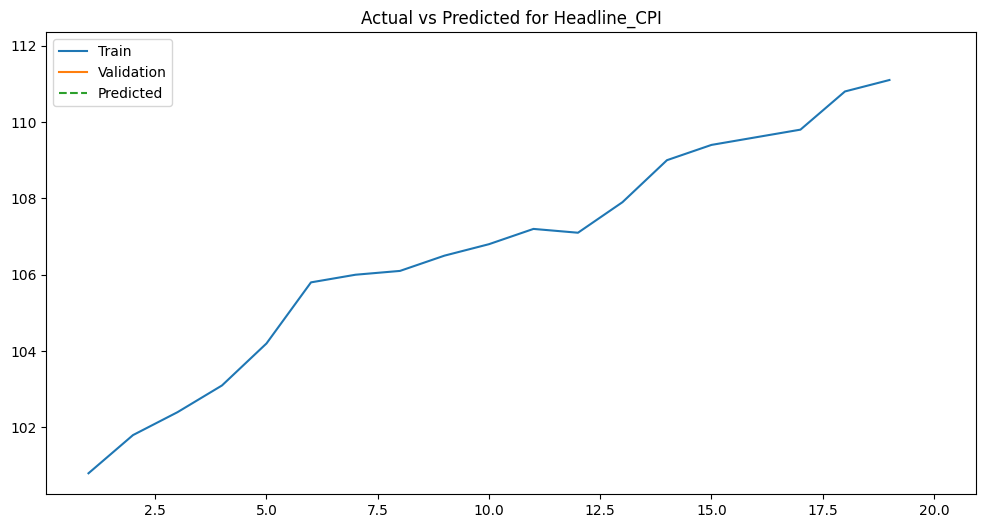

<Figure size 1200x400 with 0 Axes>

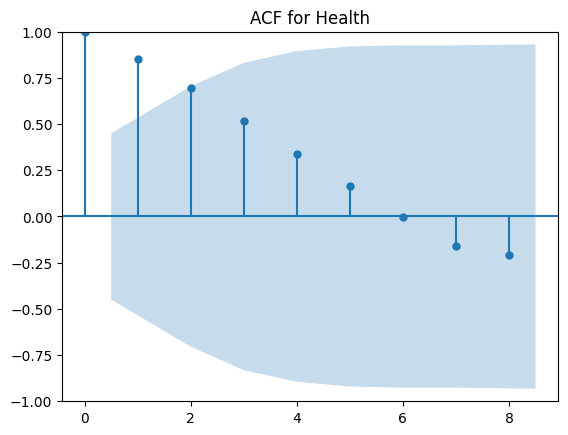

<Figure size 1200x400 with 0 Axes>

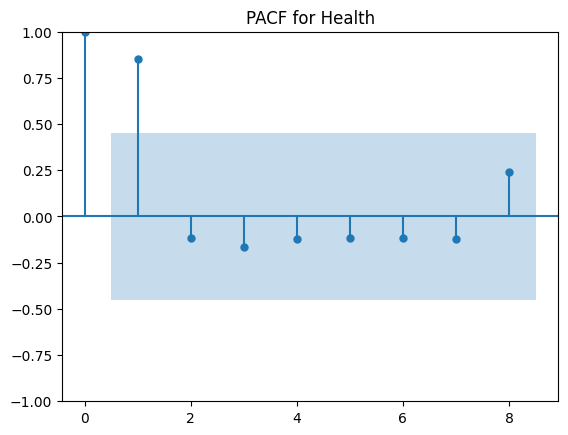

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


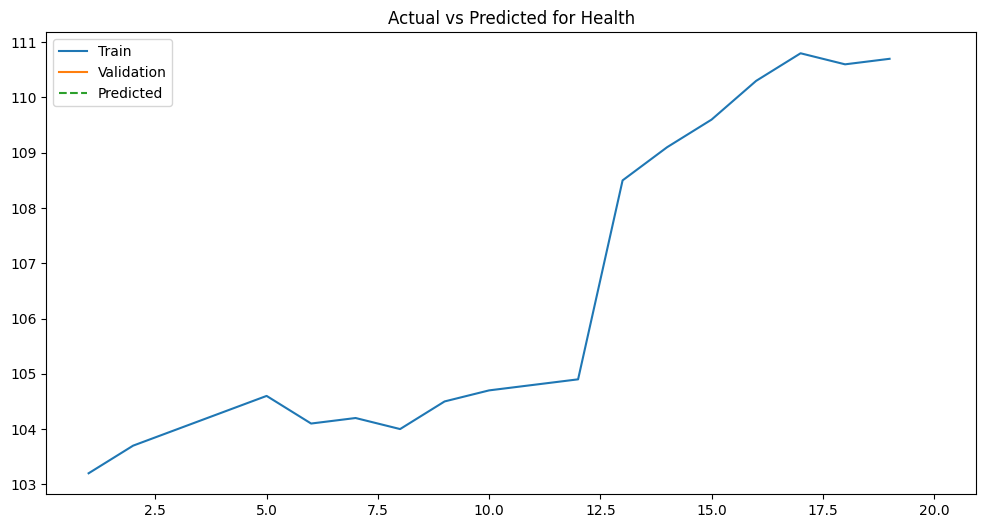

<Figure size 1200x400 with 0 Axes>

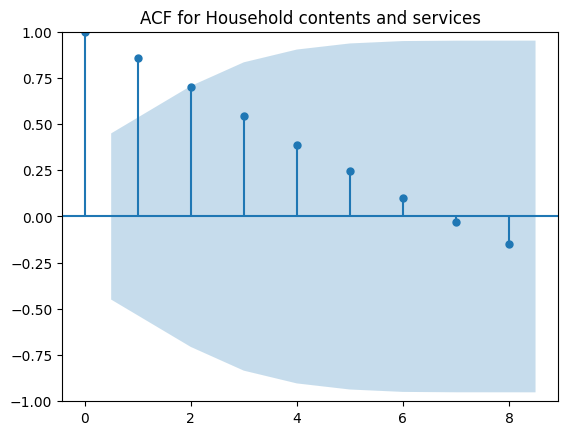

<Figure size 1200x400 with 0 Axes>

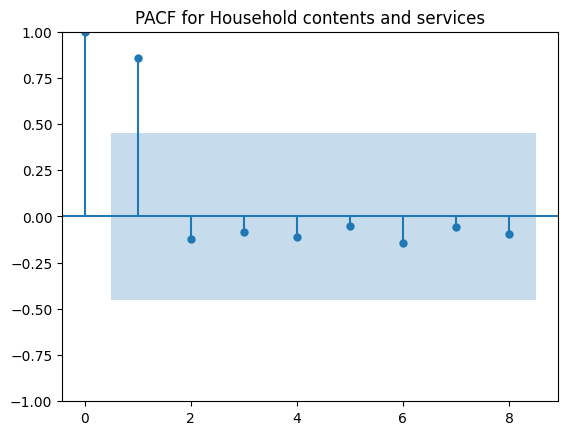

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


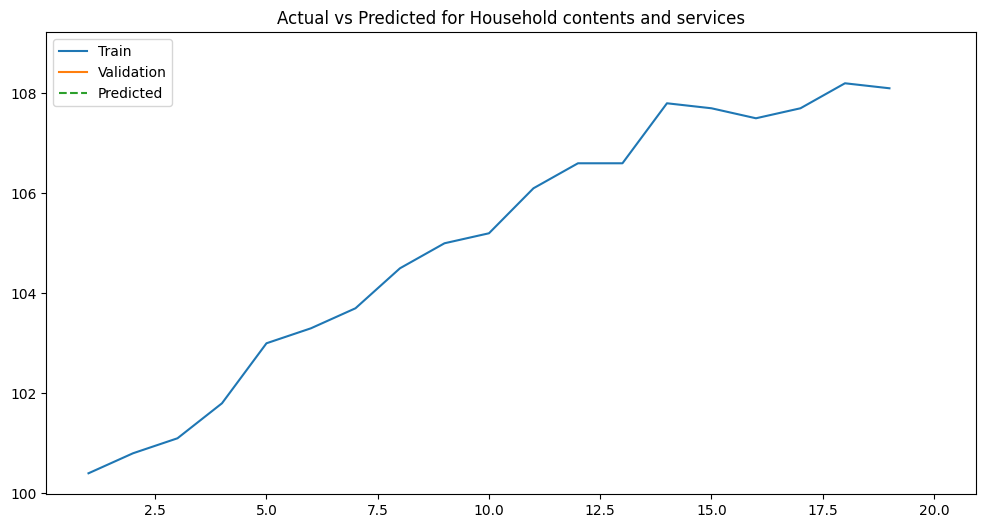

<Figure size 1200x400 with 0 Axes>

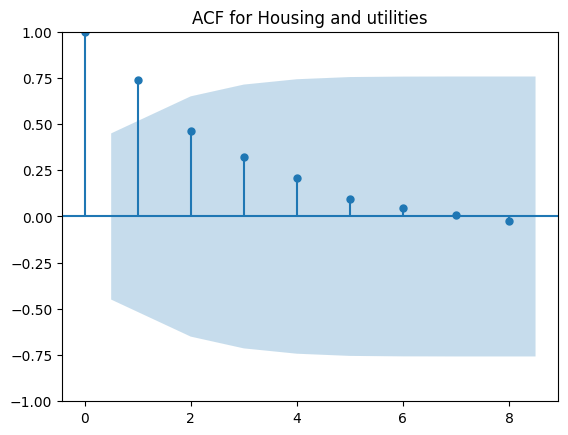

<Figure size 1200x400 with 0 Axes>

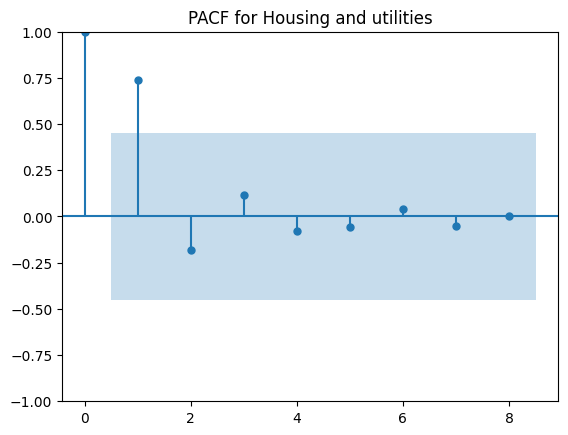

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


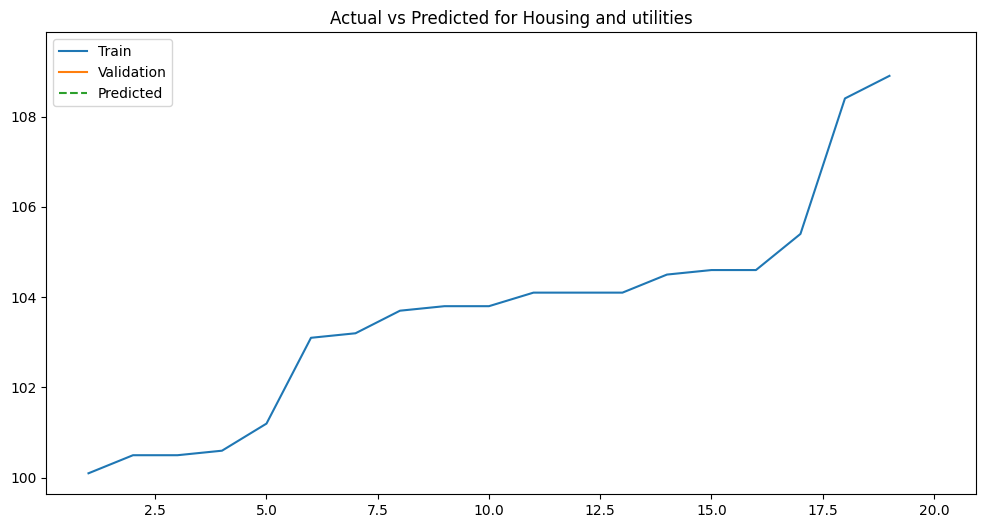

<Figure size 1200x400 with 0 Axes>

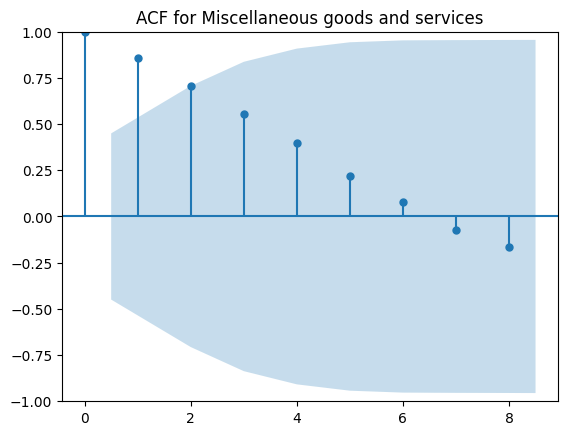

<Figure size 1200x400 with 0 Axes>

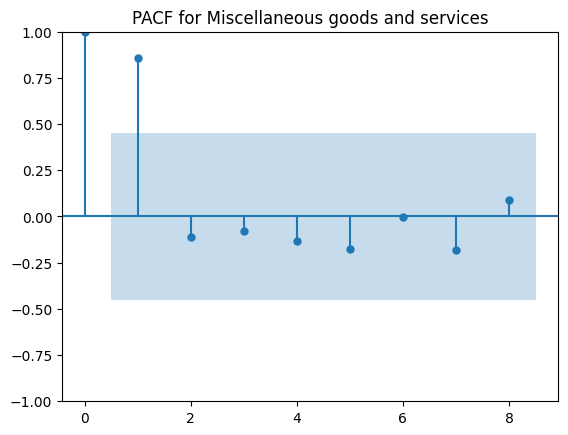

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


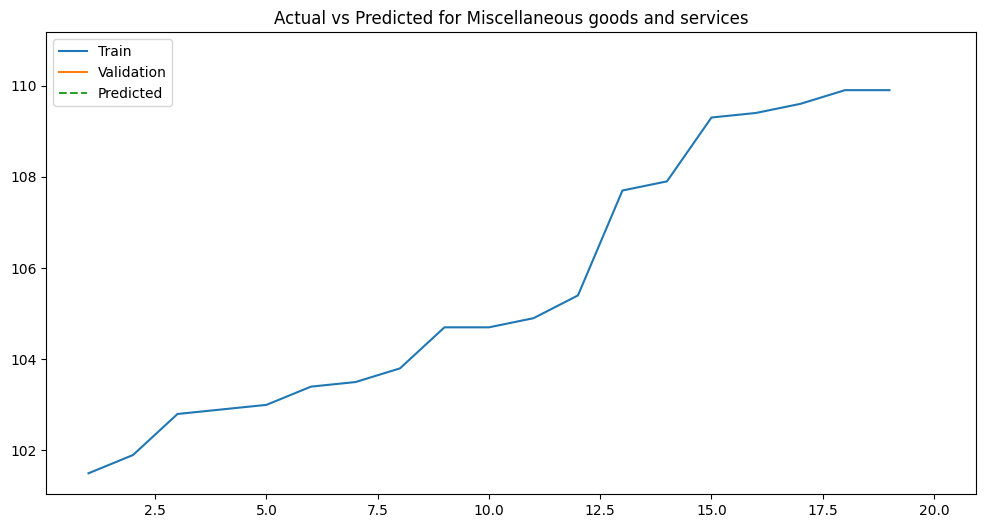

<Figure size 1200x400 with 0 Axes>

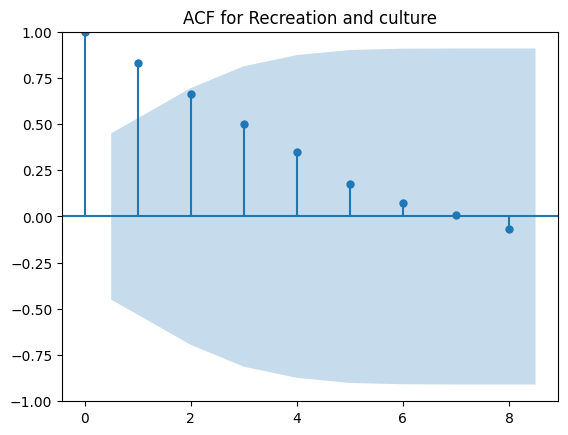

<Figure size 1200x400 with 0 Axes>

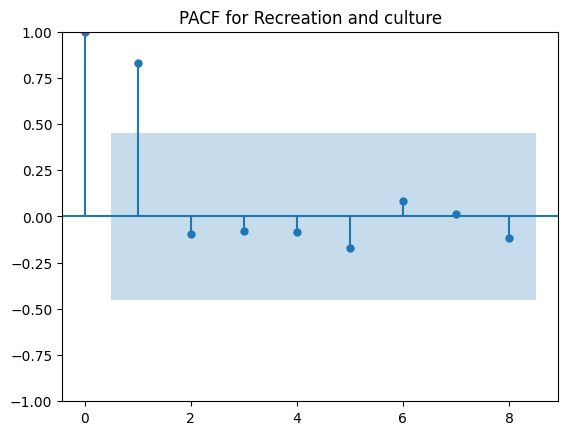

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


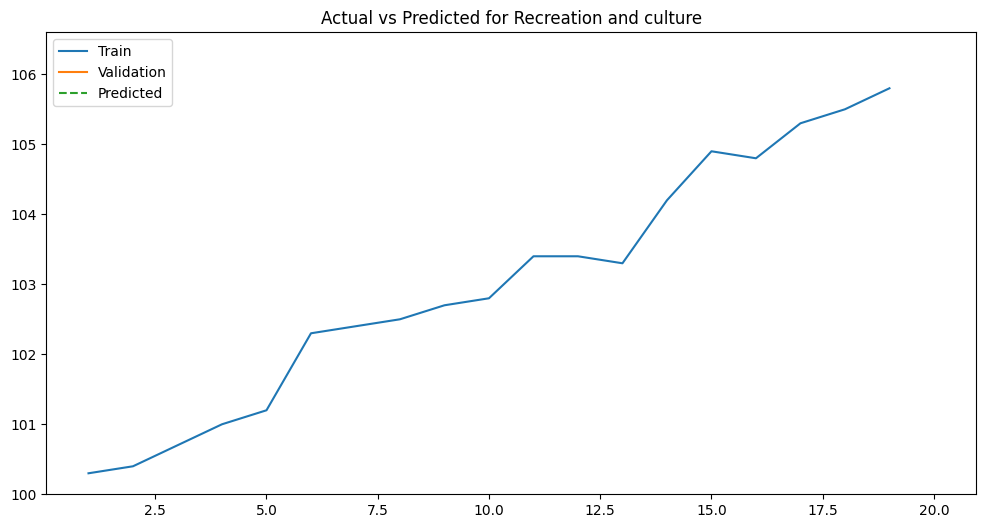

<Figure size 1200x400 with 0 Axes>

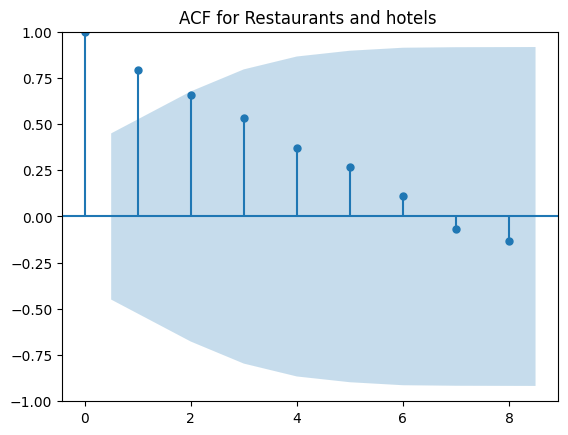

<Figure size 1200x400 with 0 Axes>

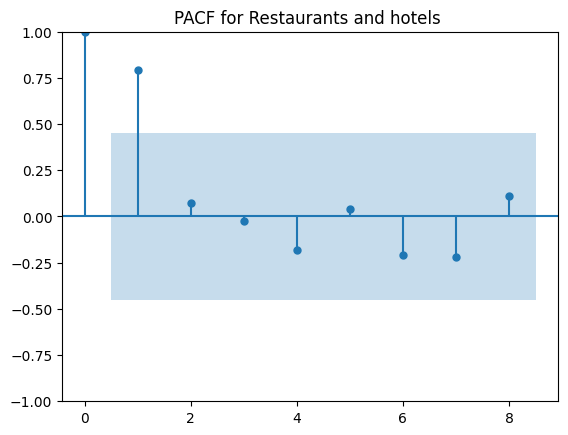

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


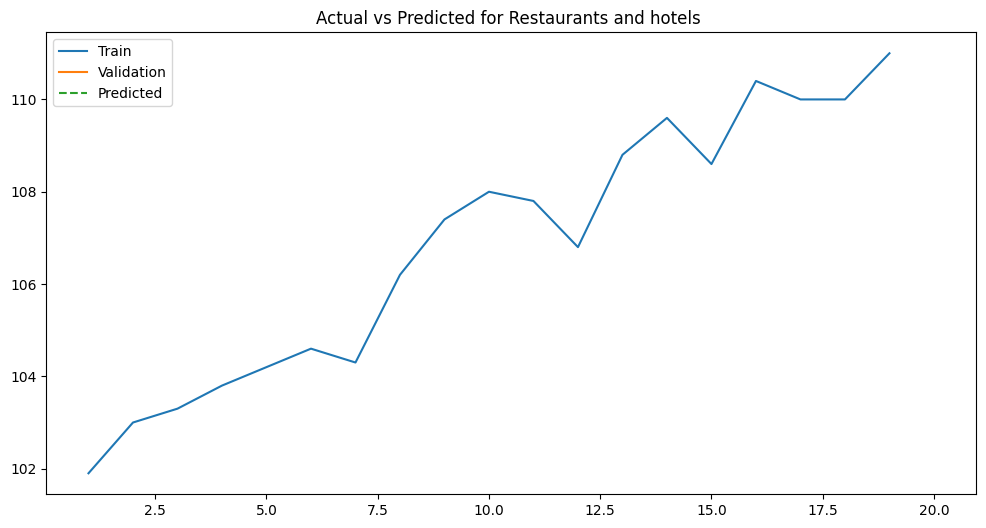

<Figure size 1200x400 with 0 Axes>

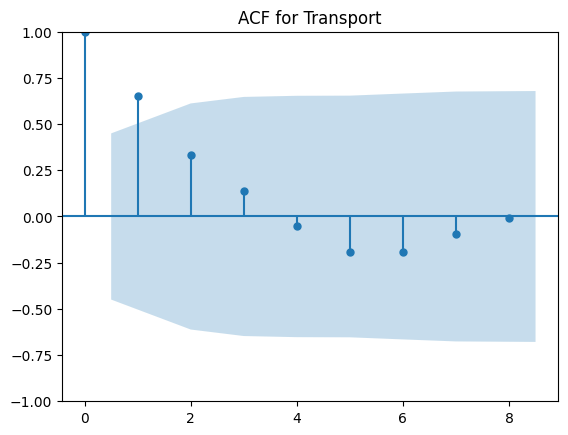

<Figure size 1200x400 with 0 Axes>

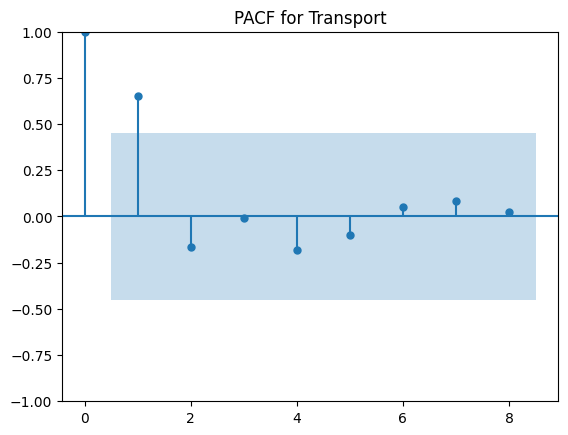

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


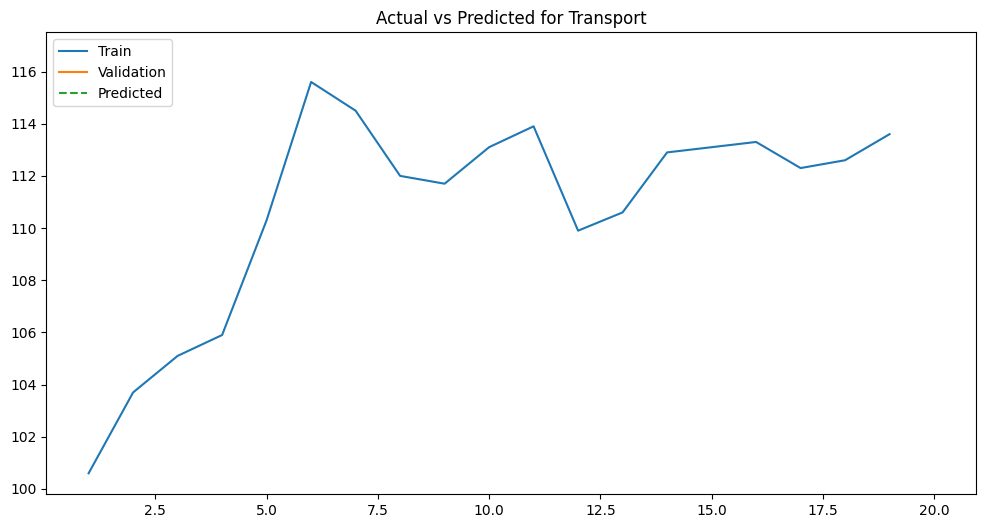

In [23]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Training and validation
X_train = training_set[features]
y_train = training_set[target_columns]

X_valid = validation_set[features]
y_valid = validation_set[target_columns]

# ACF and PACF plots
for target_col in target_columns:
    # Plot ACF
    plt.figure(figsize=(12, 4))
    plot_acf(y_train[target_col], lags=8, title=f'ACF for {target_col}')
    plt.show()

    # Plot PACF
    plt.figure(figsize=(12, 4))
    plot_pacf(y_train[target_col], lags=8, title=f'PACF for {target_col}')
    plt.show()

    # Fit SARIMAX model
    order = (0, 1, 0)  # Specify the order (p, d, q) of the non-seasonal part
    seasonal_order = (1, 1, 1, 8)  # Specify the order (P, D, Q, s) of the seasonal part

    model = SARIMAX(y_train[target_col], order=order, seasonal_order=seasonal_order)
    results = model.fit()

    # Predict on validation set
    y_pred = results.get_forecast(steps=len(X_valid))
    y_pred_mean = y_pred.predicted_mean

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(y_train[target_col], label='Train')
    plt.plot(y_valid[target_col], label='Validation')
    plt.plot(y_pred_mean, label='Predicted', linestyle='dashed')
    plt.title(f'Actual vs Predicted for {target_col}')
    plt.legend()
    plt.show()


<Figure size 1200x400 with 0 Axes>

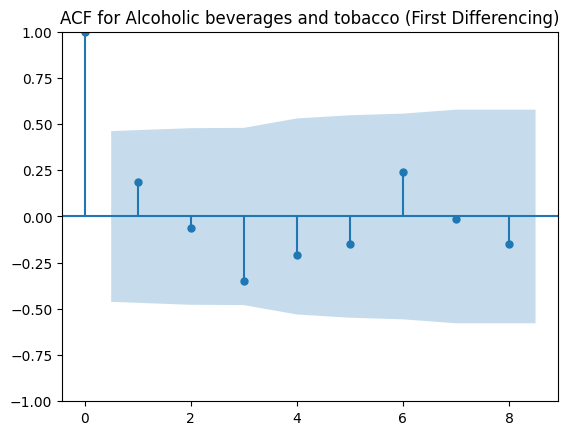

<Figure size 1200x400 with 0 Axes>

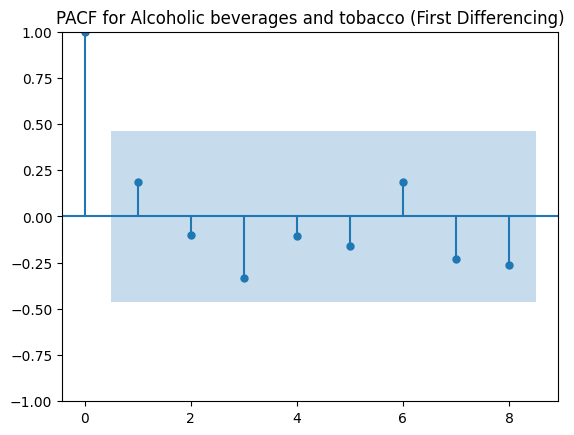

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


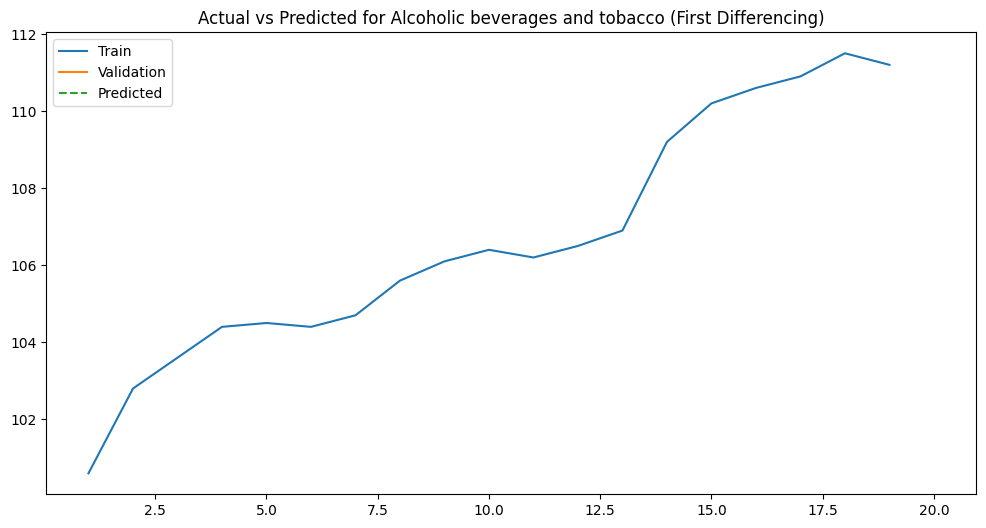

<Figure size 1200x400 with 0 Axes>

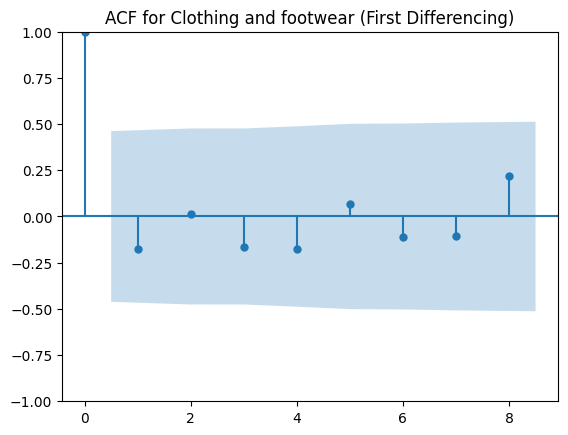

<Figure size 1200x400 with 0 Axes>

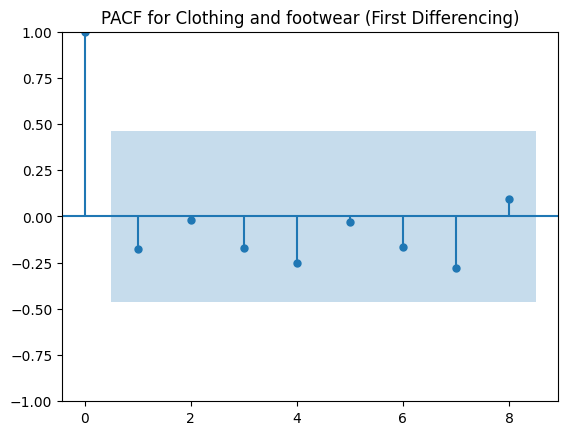

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


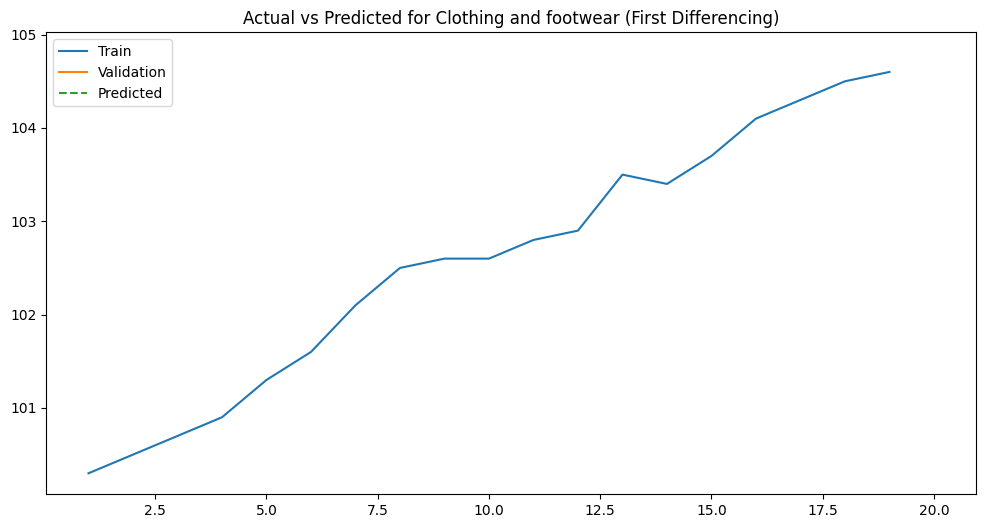

<Figure size 1200x400 with 0 Axes>

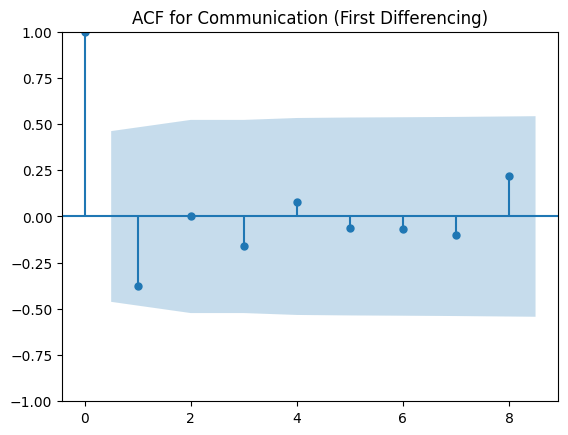

<Figure size 1200x400 with 0 Axes>

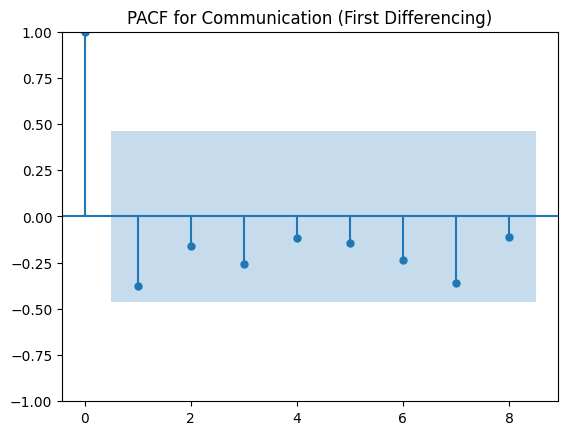

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


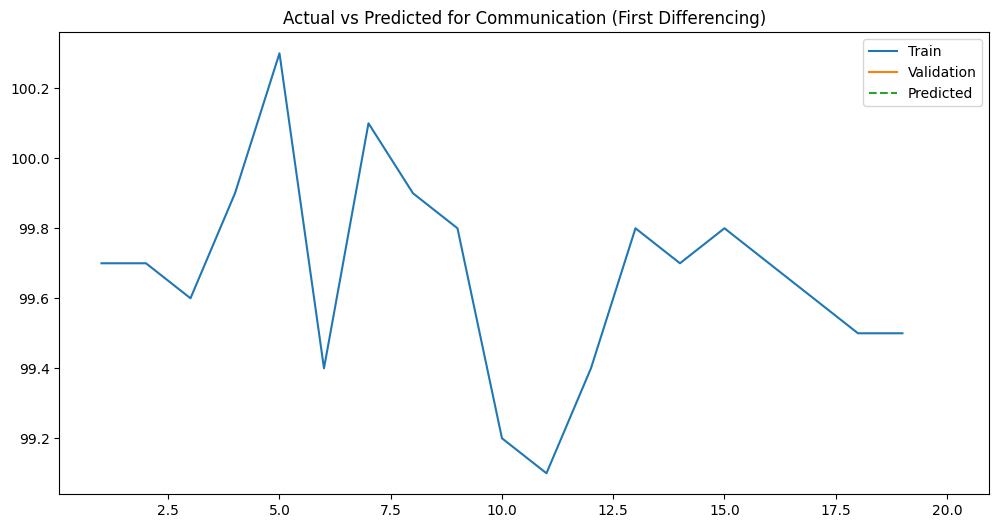

<Figure size 1200x400 with 0 Axes>

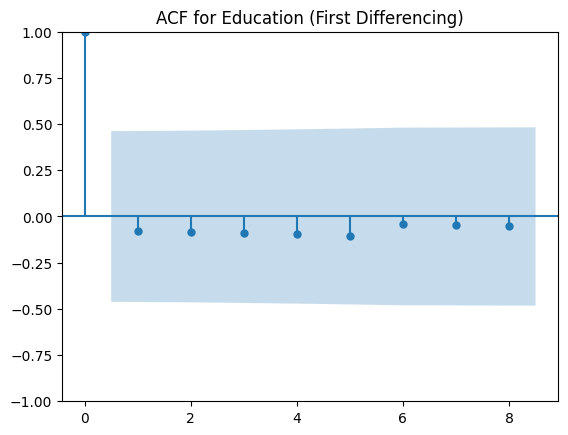

<Figure size 1200x400 with 0 Axes>

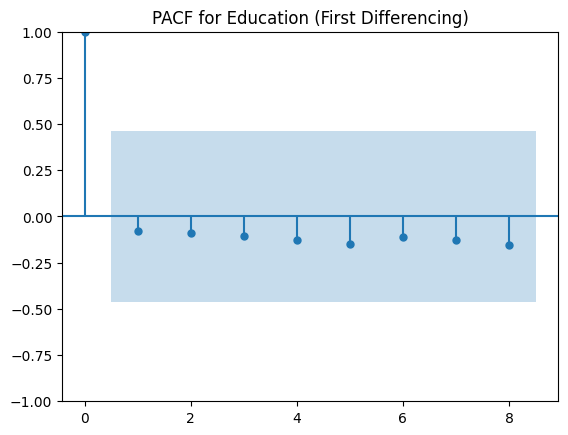

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


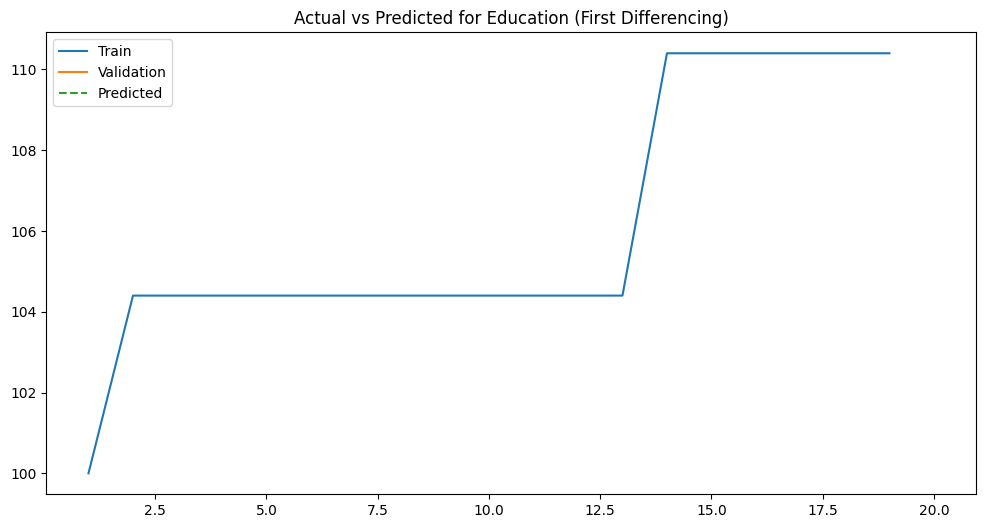

<Figure size 1200x400 with 0 Axes>

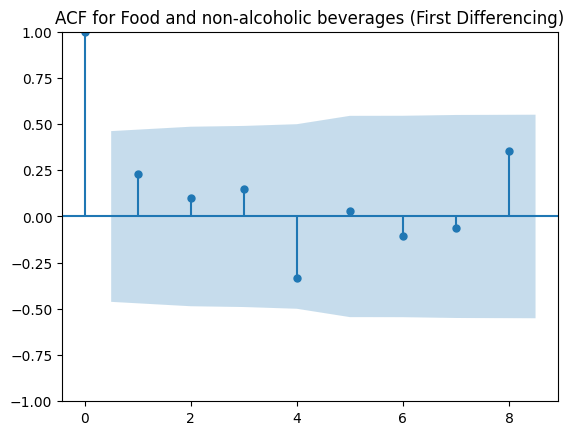

<Figure size 1200x400 with 0 Axes>

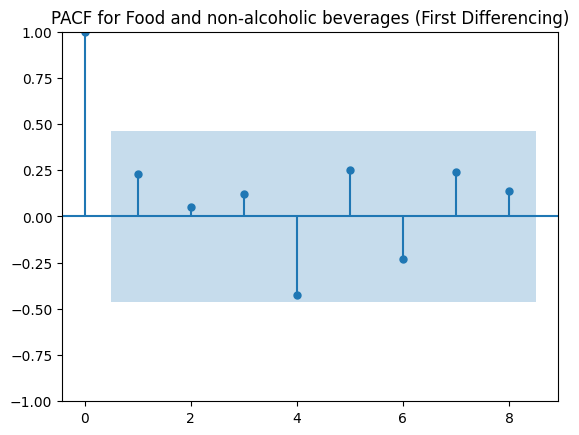

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


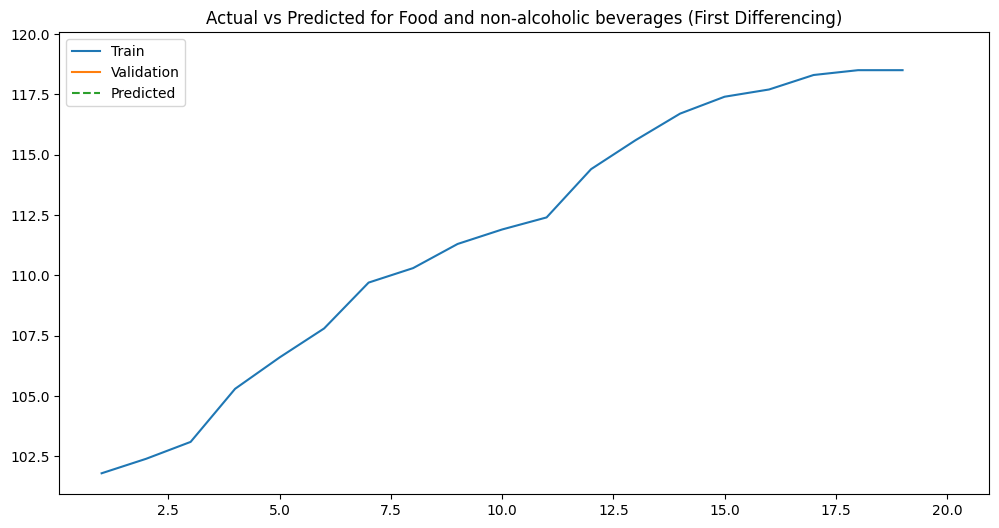

<Figure size 1200x400 with 0 Axes>

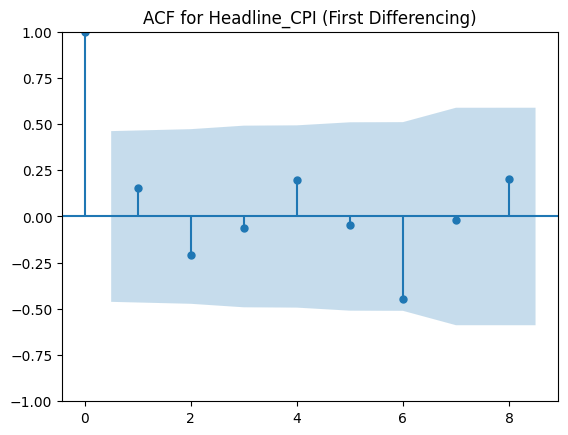

<Figure size 1200x400 with 0 Axes>

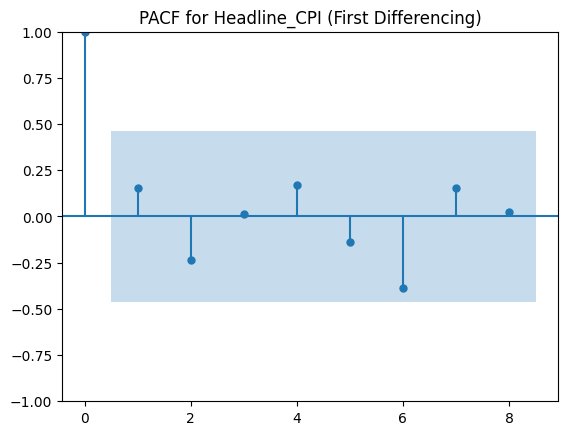

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


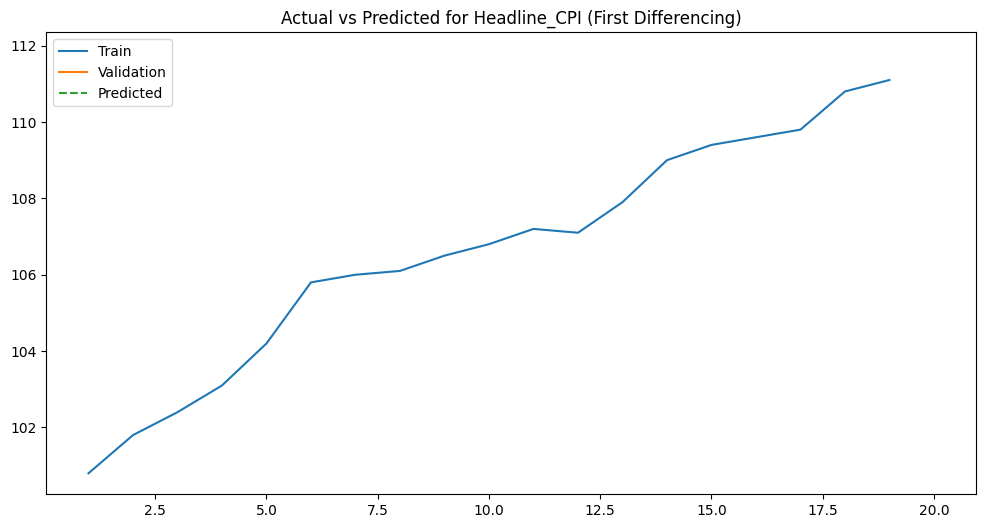

<Figure size 1200x400 with 0 Axes>

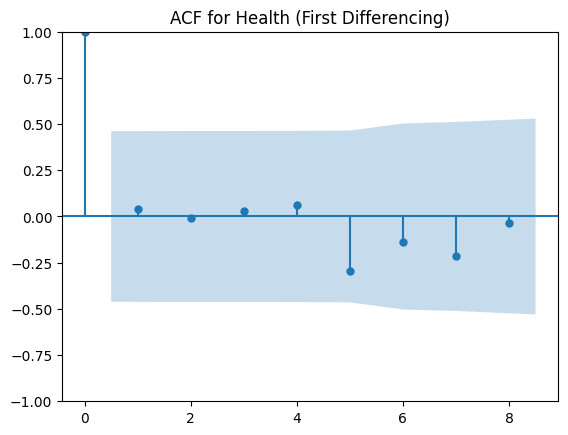

<Figure size 1200x400 with 0 Axes>

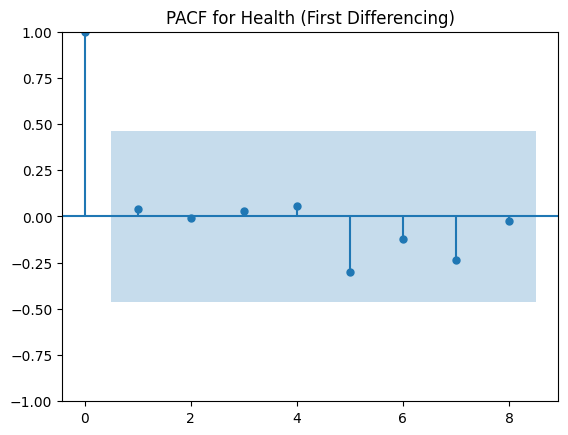

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


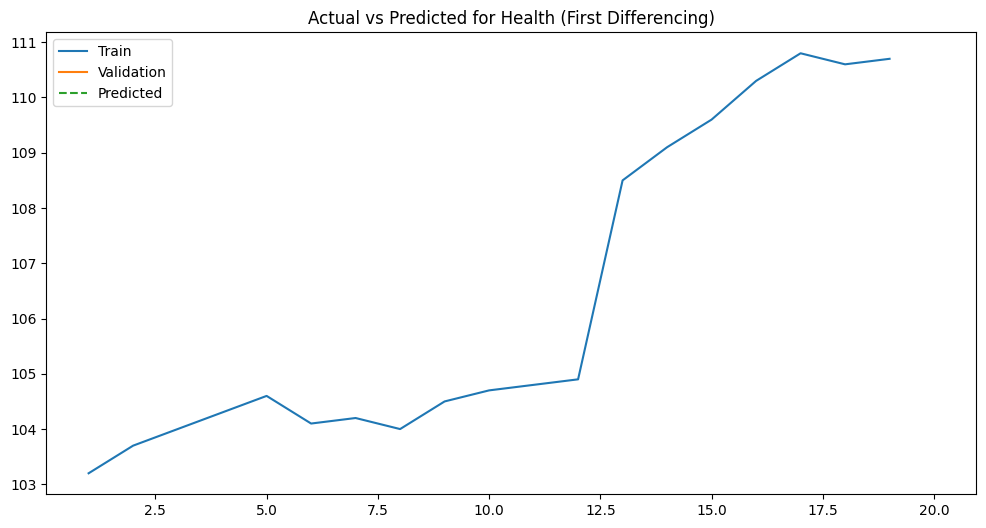

<Figure size 1200x400 with 0 Axes>

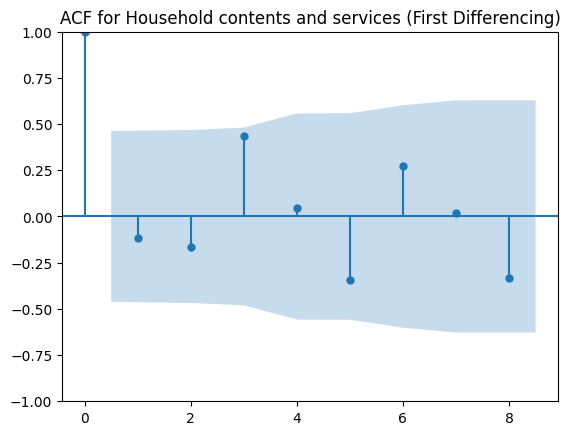

<Figure size 1200x400 with 0 Axes>

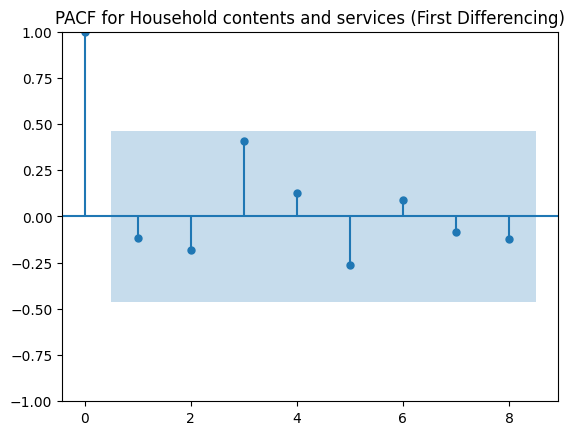

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


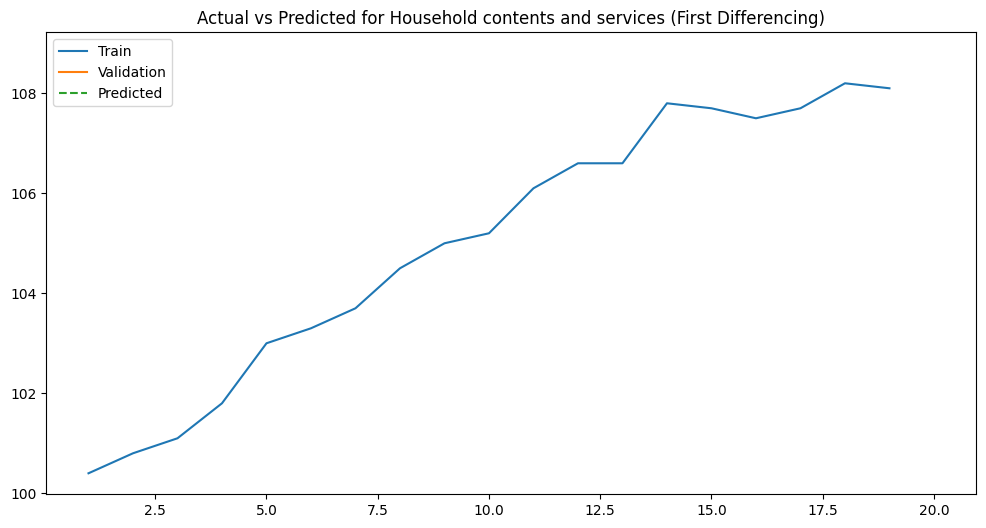

<Figure size 1200x400 with 0 Axes>

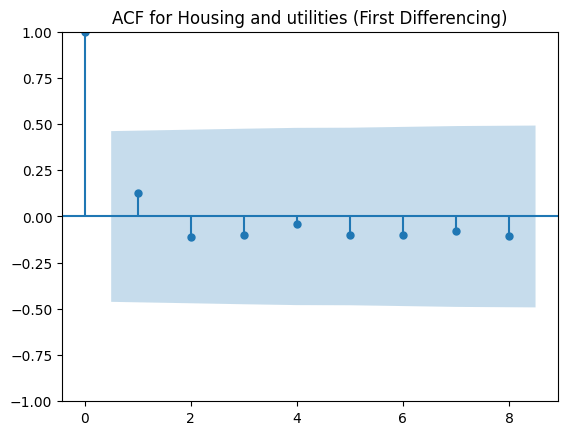

<Figure size 1200x400 with 0 Axes>

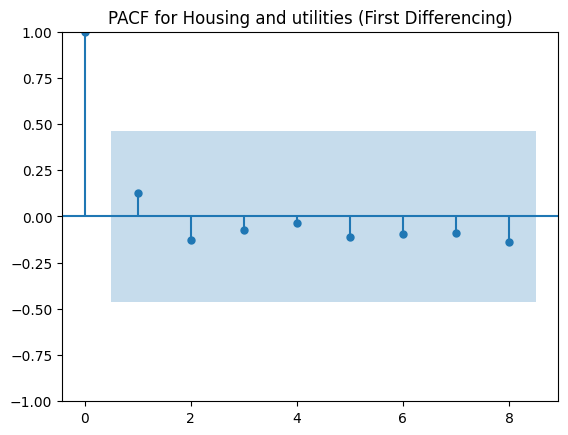

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


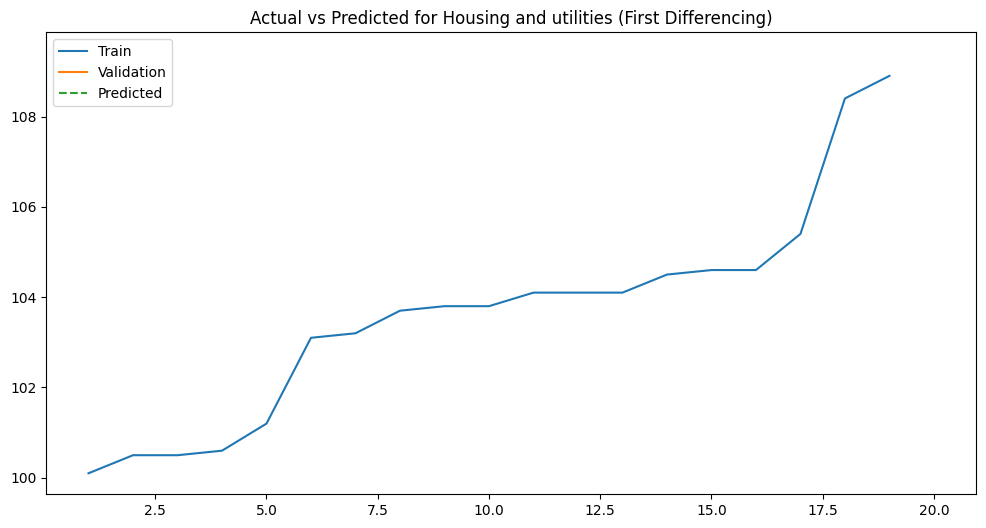

<Figure size 1200x400 with 0 Axes>

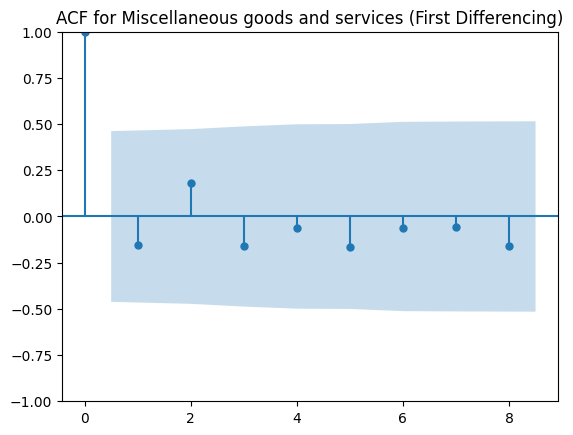

<Figure size 1200x400 with 0 Axes>

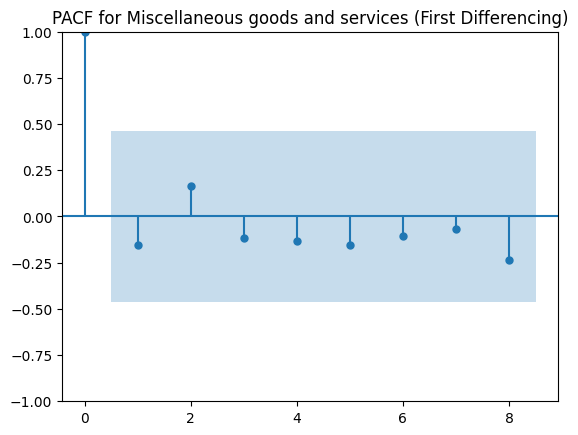

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


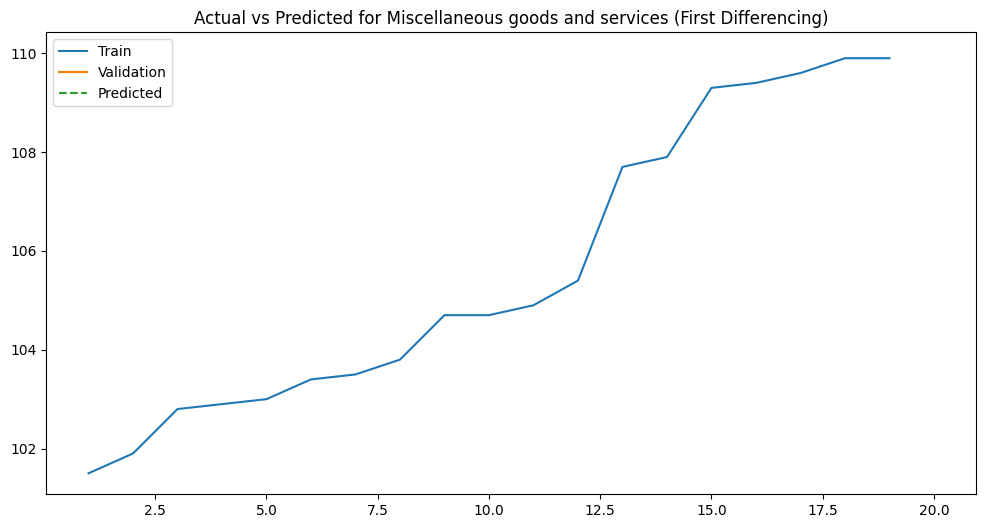

<Figure size 1200x400 with 0 Axes>

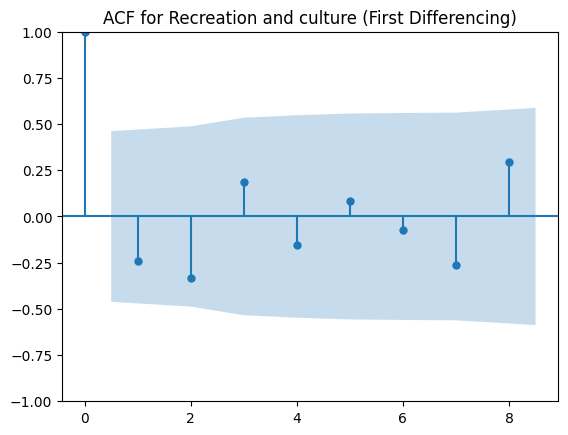

<Figure size 1200x400 with 0 Axes>

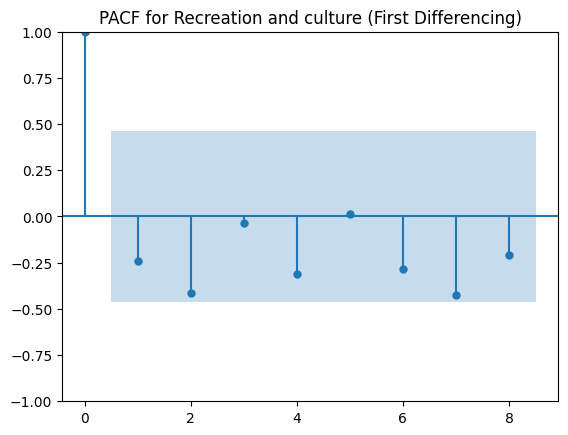

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


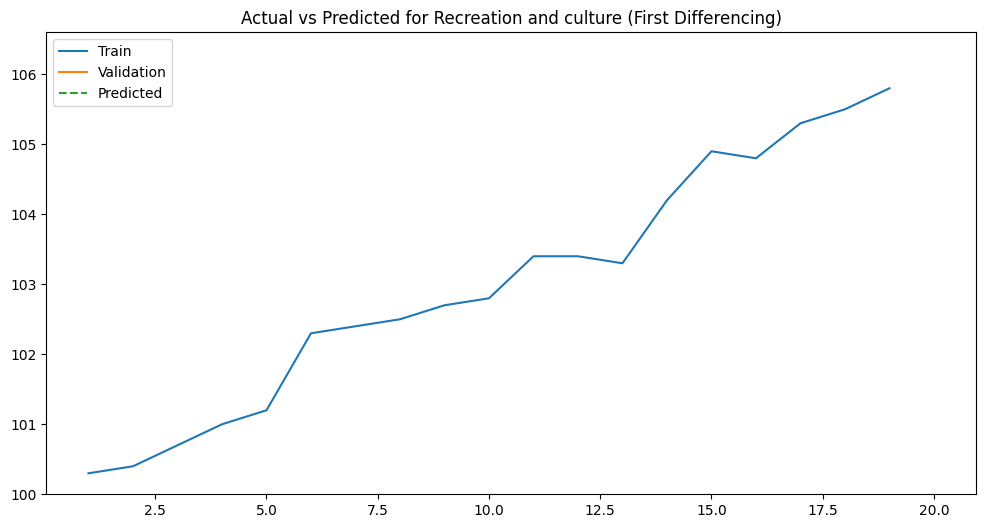

<Figure size 1200x400 with 0 Axes>

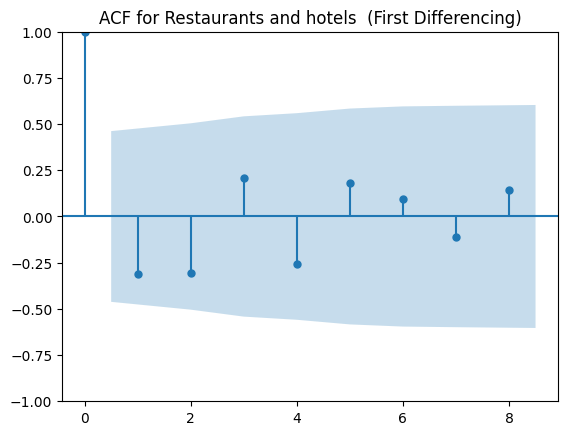

<Figure size 1200x400 with 0 Axes>

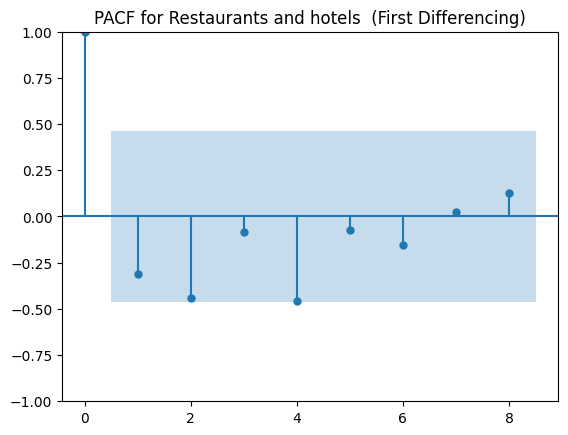

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


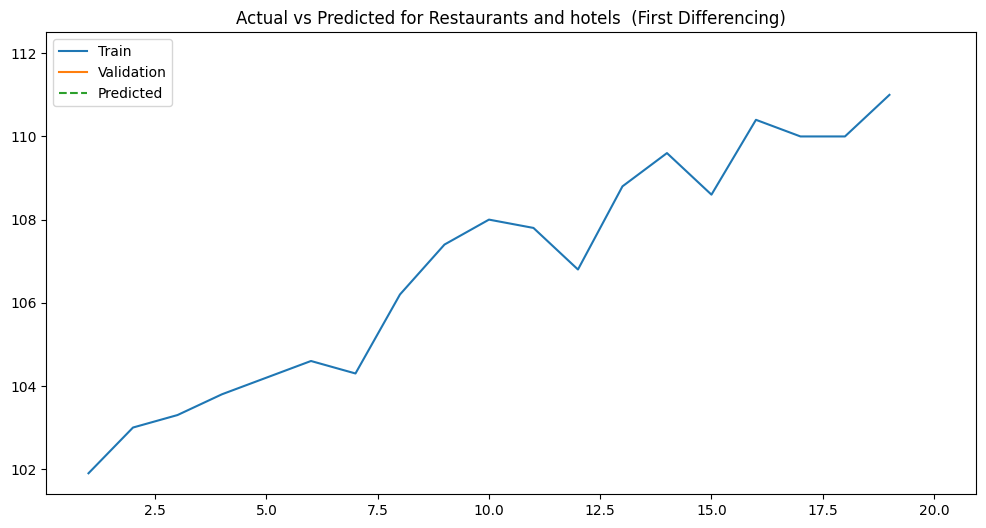

<Figure size 1200x400 with 0 Axes>

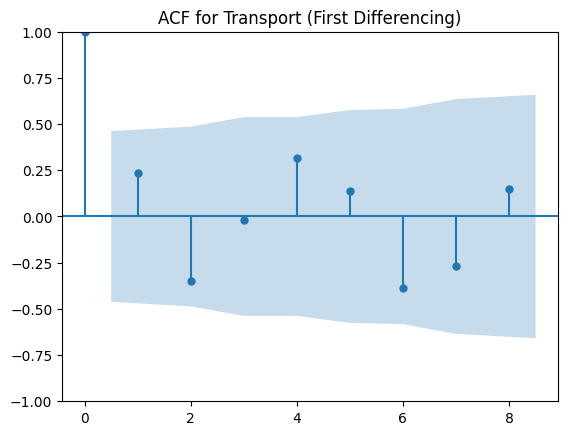

<Figure size 1200x400 with 0 Axes>

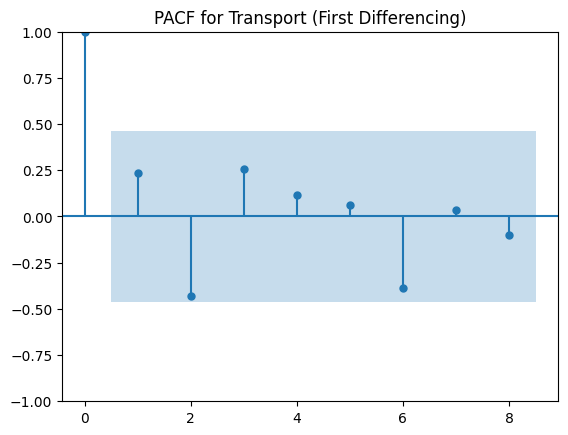

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


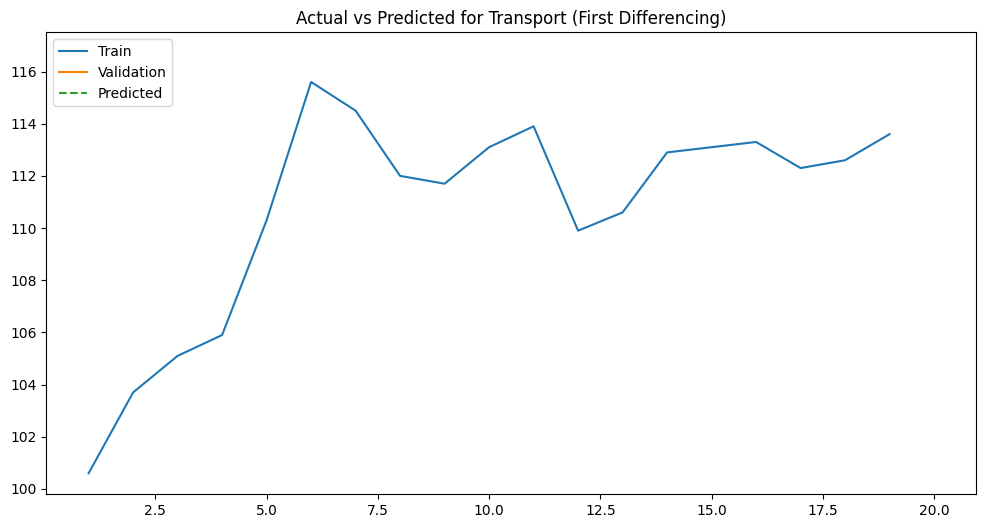

Predictions for Alcoholic beverages and tobacco:
[110.9]


Predictions for Clothing and footwear:
[104.7]


Predictions for Communication:
[99.5]


Predictions for Education:
[110.4]


Predictions for Food and non-alcoholic beverages:
[118.5]


Predictions for Headline_CPI:
[111.4]


Predictions for Health:
[110.8]


Predictions for Household contents and services:
[108.]


Predictions for Housing and utilities:
[109.4]


Predictions for Miscellaneous goods and services:
[109.9]


Predictions for Recreation and culture:
[106.1]


Predictions for Restaurants and hotels :
[112.]


Predictions for Transport:
[114.6]




In [24]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# Training and validation
X_train = training_set[features]
y_train = training_set[target_columns]

X_valid = validation_set[features]
y_valid = validation_set[target_columns]

# List to store rounded predictions for each target column
all_y_pred = []

# ACF and PACF plots
for target_col in target_columns:
    # Plot ACF
    plt.figure(figsize=(12, 4))
    plot_acf(y_train[target_col].diff().dropna(), lags=8, title=f'ACF for {target_col} (First Differencing)')
    plt.show()

    # Plot PACF
    plt.figure(figsize=(12, 4))
    plot_pacf(y_train[target_col].diff().dropna(), lags=8, title=f'PACF for {target_col} (First Differencing)')
    plt.show()

    # Fit SARIMAX model with first differencing
    order = (0, 1, 0)  # Specify the order (p, d, q) of the non-seasonal part
    seasonal_order = (1, 1, 1, 30)  # Specify the order (P, D, Q, s) of the seasonal part

    model = SARIMAX(y_train[target_col].diff().dropna(), order=order, seasonal_order=seasonal_order)
    results = model.fit()

    # Predict on validation set
    y_pred_diff = results.get_forecast(steps=len(X_valid))
    y_pred_mean_diff = y_pred_diff.predicted_mean

    # Invert differencing to get predictions in the original scale
    y_pred_mean = y_train[target_col].iloc[-1] + y_pred_mean_diff.cumsum()

    # Round predictions to 5 decimal points
    y_pred_mean_rounded = np.round(y_pred_mean.values, 5)

    # Append rounded predictions to the list
    all_y_pred.append((target_col, y_pred_mean_rounded))

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(y_train[target_col], label='Train')
    plt.plot(y_valid[target_col], label='Validation')
    plt.plot(y_pred_mean, label='Predicted', linestyle='dashed')
    plt.title(f'Actual vs Predicted for {target_col} (First Differencing)')
    plt.legend()
    plt.show()

# Display the list of rounded predictions
for target_col, y_pred in all_y_pred:
    print(f'Predictions for {target_col}:')
    print(y_pred)
    print('\n')



In [25]:
print("List of All Predictions:")
for y_pred in all_y_pred:
    print(y_pred)

List of All Predictions:
('Alcoholic beverages and tobacco', array([110.9]))
('Clothing and footwear', array([104.7]))
('Communication', array([99.5]))
('Education', array([110.4]))
('Food and non-alcoholic beverages', array([118.5]))
('Headline_CPI', array([111.4]))
('Health', array([110.8]))
('Household contents and services', array([108.]))
('Housing and utilities', array([109.4]))
('Miscellaneous goods and services', array([109.9]))
('Recreation and culture', array([106.1]))
('Restaurants and hotels ', array([112.]))
('Transport', array([114.6]))


In [26]:
# Transpose the array of predictions
y_pred = np.array([pred for _, pred in all_y_pred]).T

# Create a DataFrame with all predictions and validation values
df = pd.DataFrame({'y_pred': y_pred.flatten(), 'y_val': y_valid.values.flatten()})

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df['y_pred'], df['y_val']))
print(f"RMSE: {rmse}")


RMSE: 0.7590479867266939


<Figure size 1200x400 with 0 Axes>

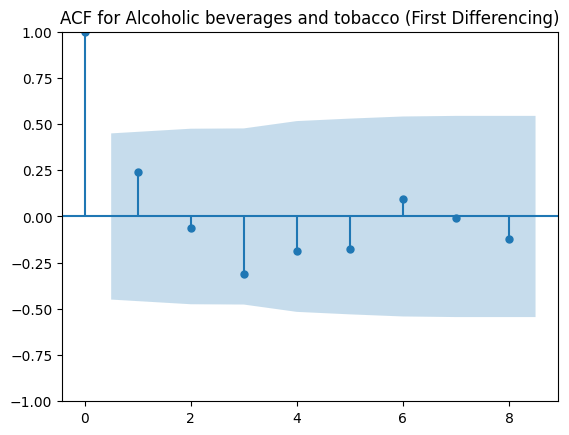

<Figure size 1200x400 with 0 Axes>

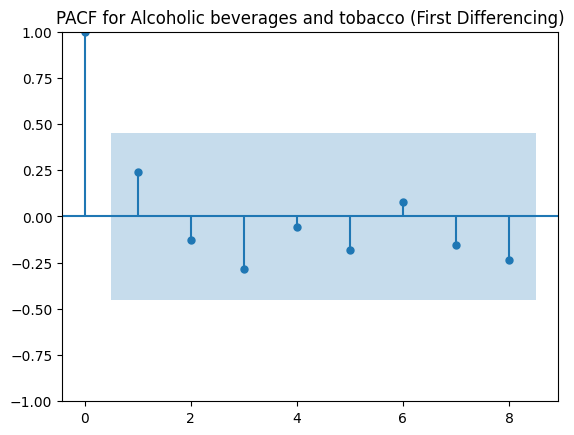

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


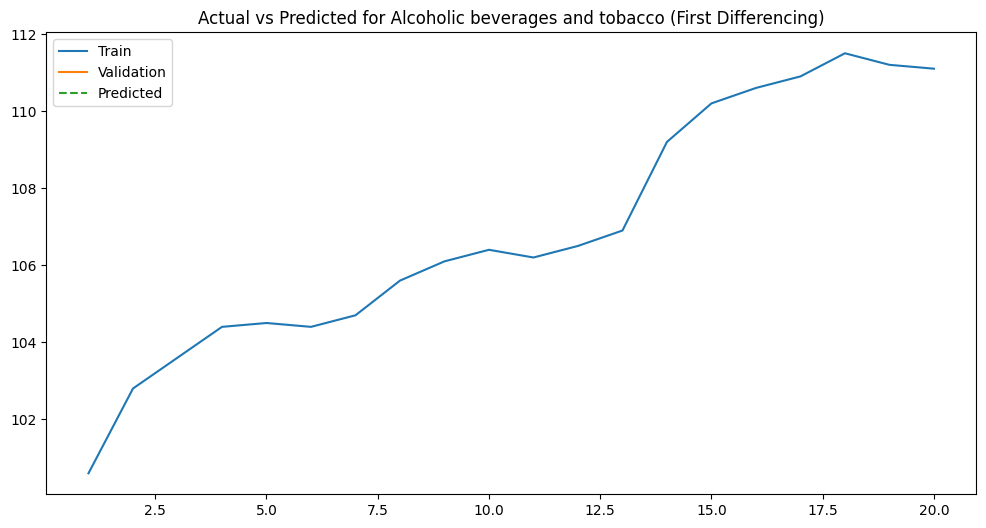

<Figure size 1200x400 with 0 Axes>

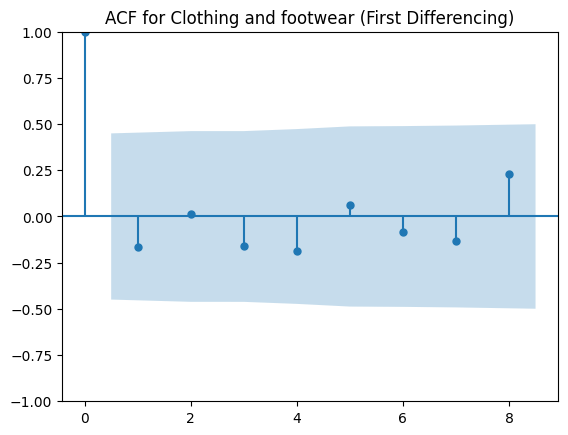

<Figure size 1200x400 with 0 Axes>

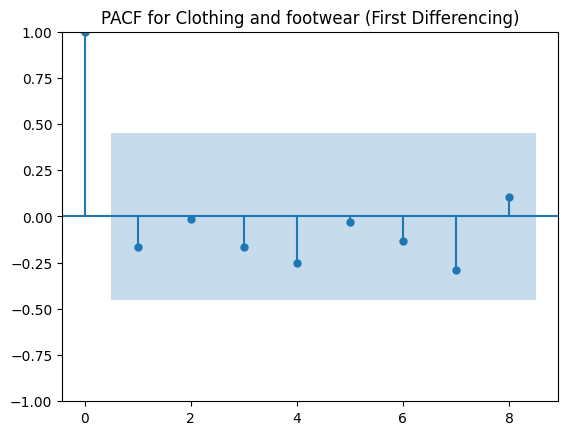

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


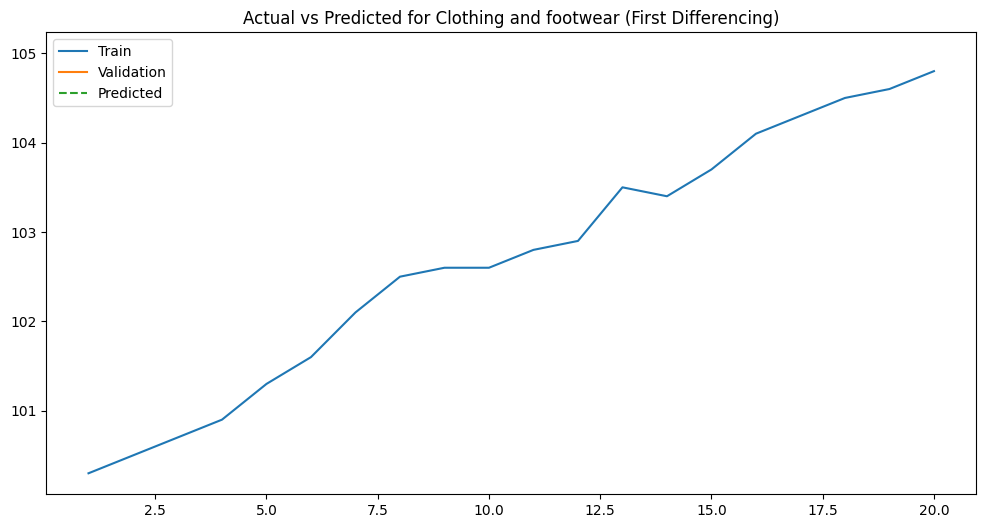

<Figure size 1200x400 with 0 Axes>

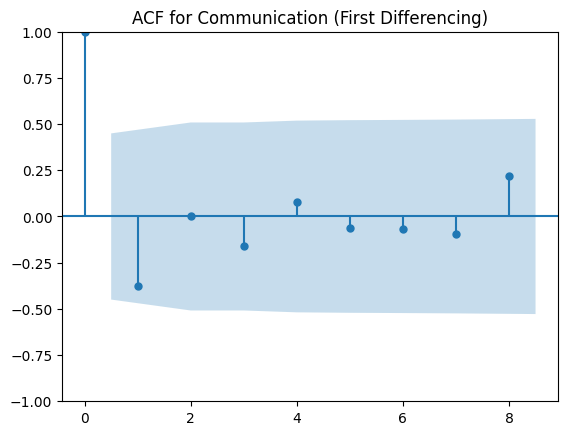

<Figure size 1200x400 with 0 Axes>

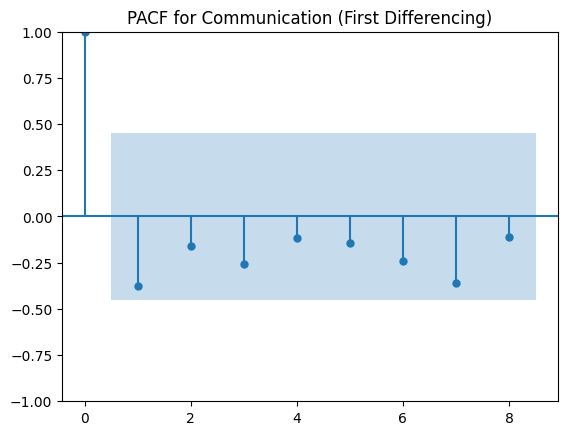

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


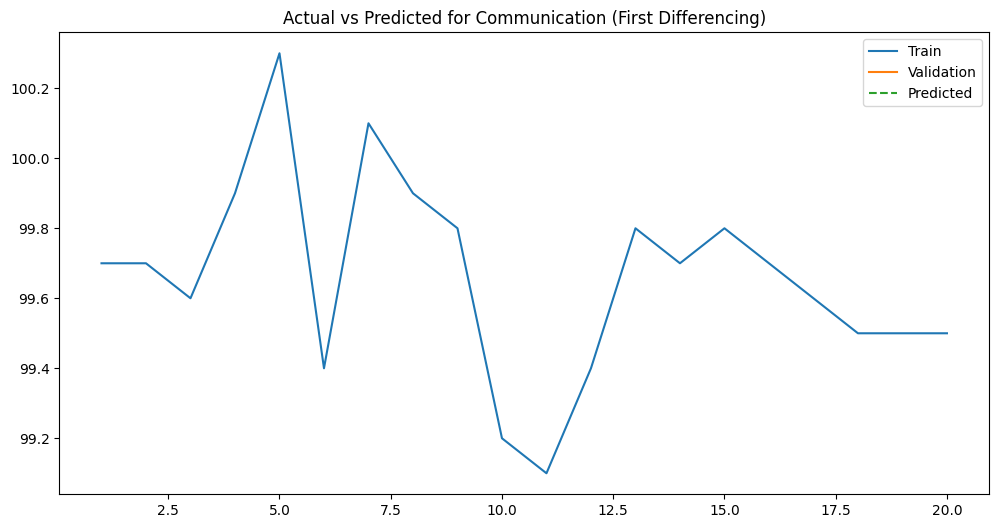

<Figure size 1200x400 with 0 Axes>

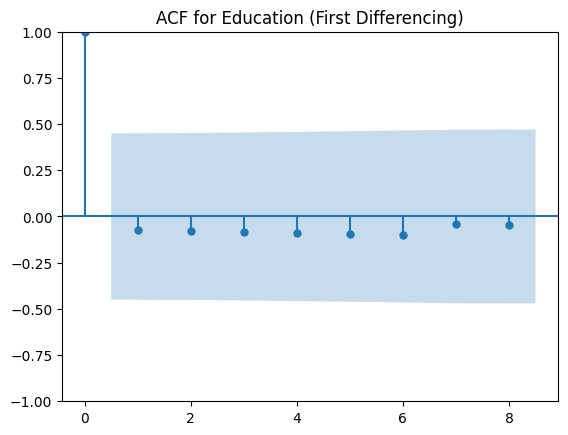

<Figure size 1200x400 with 0 Axes>

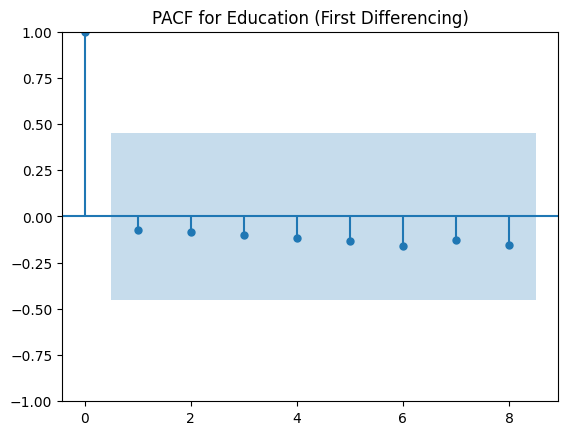

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


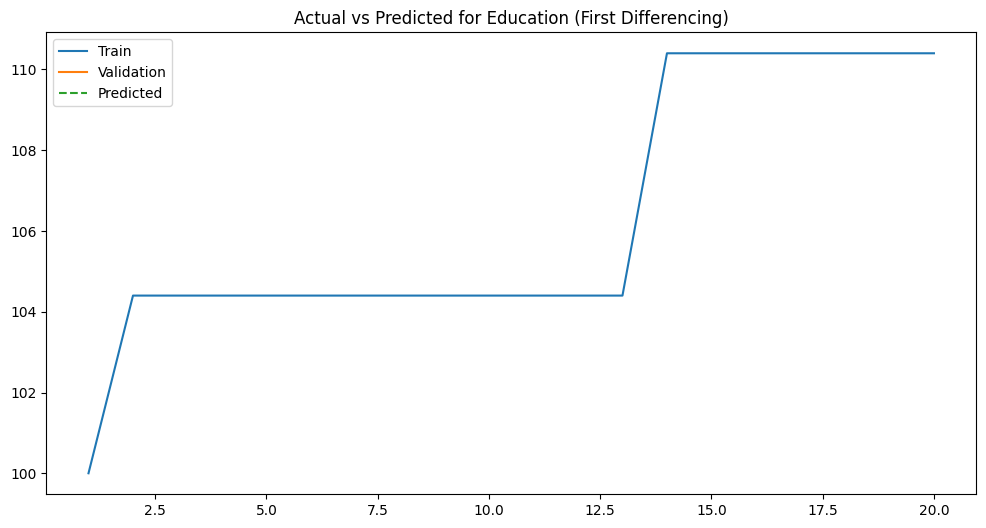

<Figure size 1200x400 with 0 Axes>

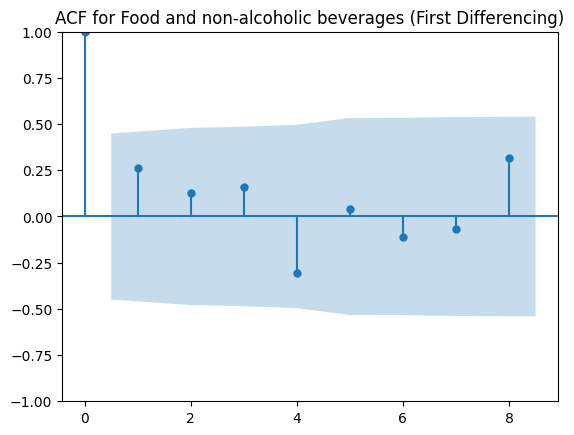

<Figure size 1200x400 with 0 Axes>

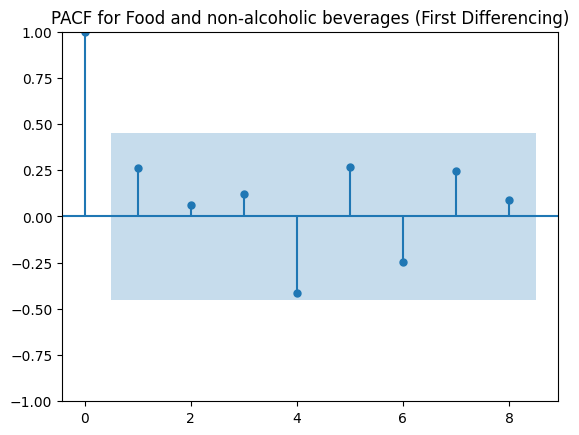

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


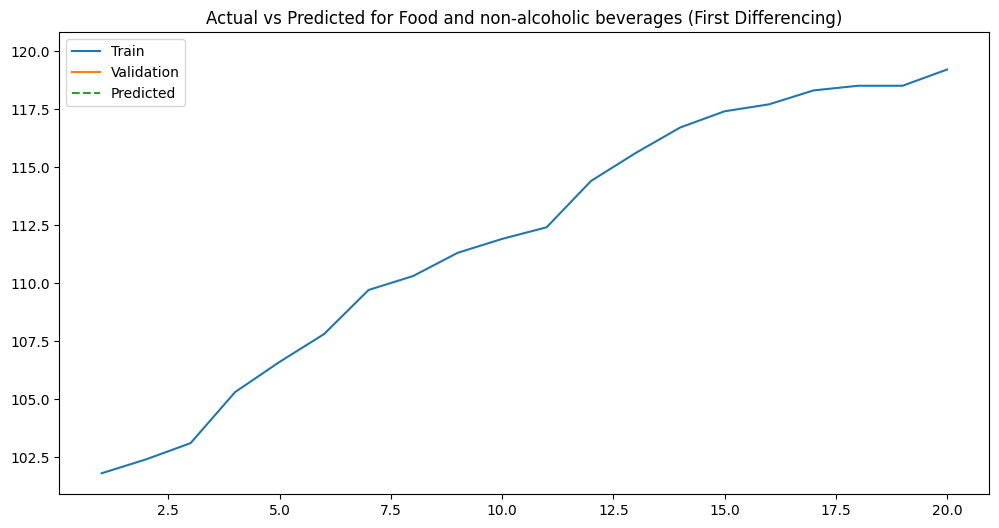

<Figure size 1200x400 with 0 Axes>

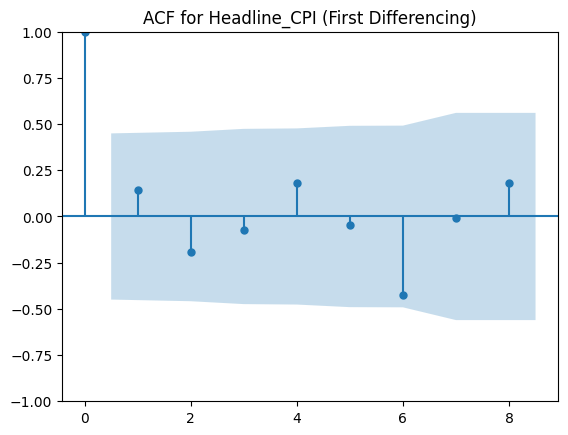

<Figure size 1200x400 with 0 Axes>

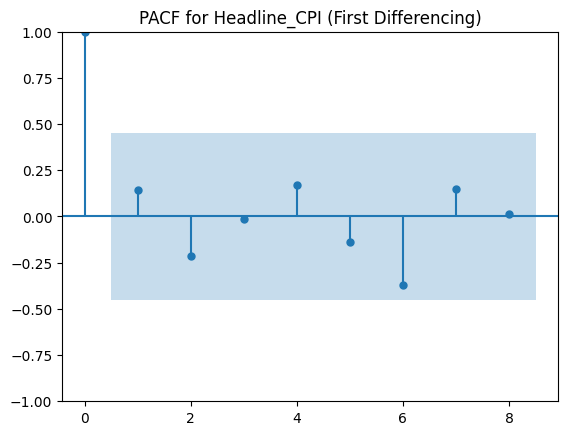

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


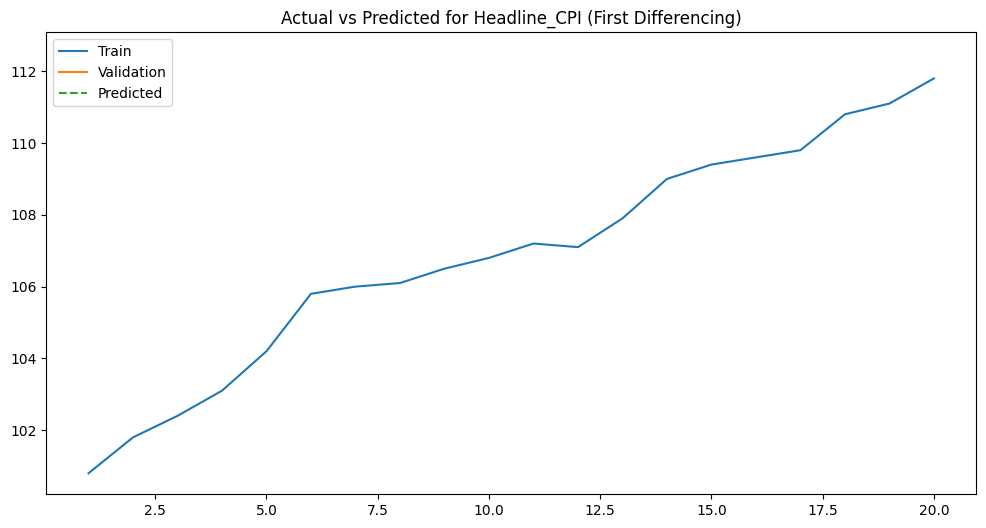

<Figure size 1200x400 with 0 Axes>

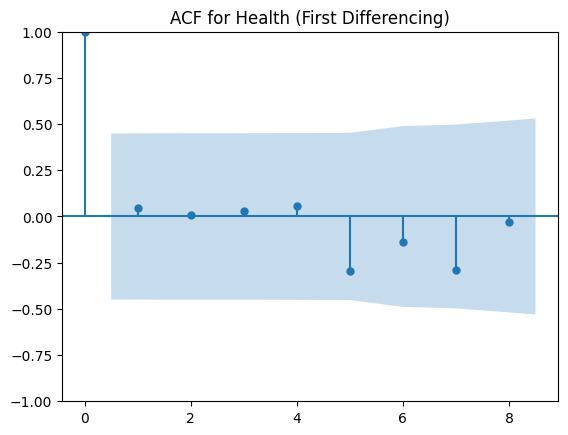

<Figure size 1200x400 with 0 Axes>

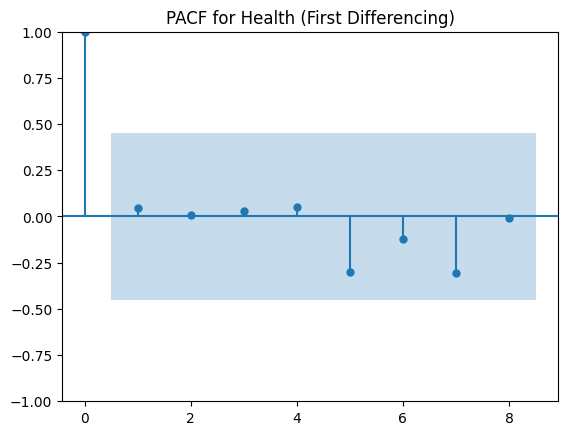

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


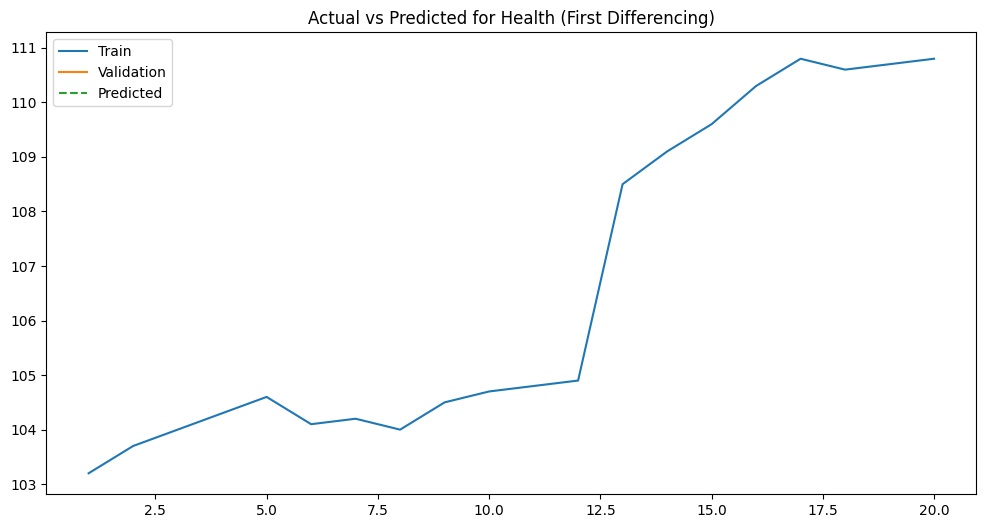

<Figure size 1200x400 with 0 Axes>

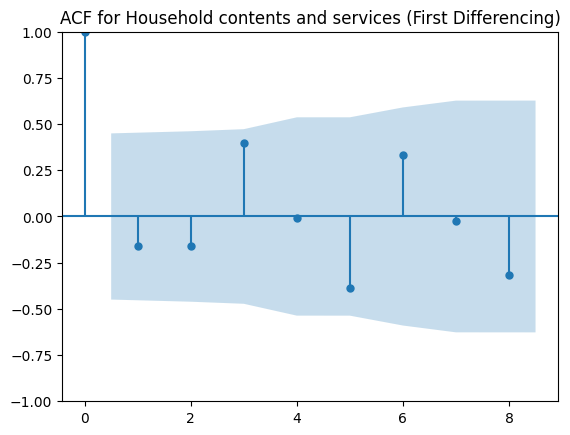

<Figure size 1200x400 with 0 Axes>

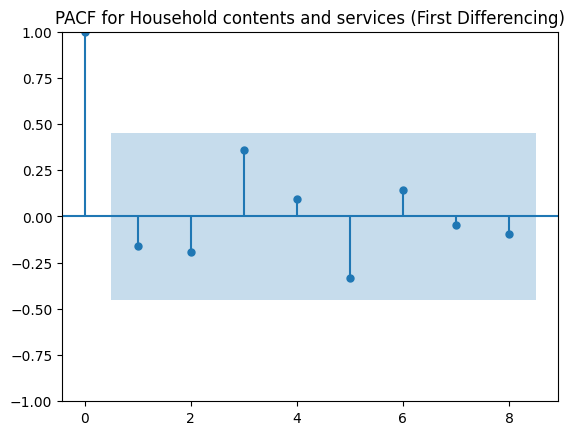

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


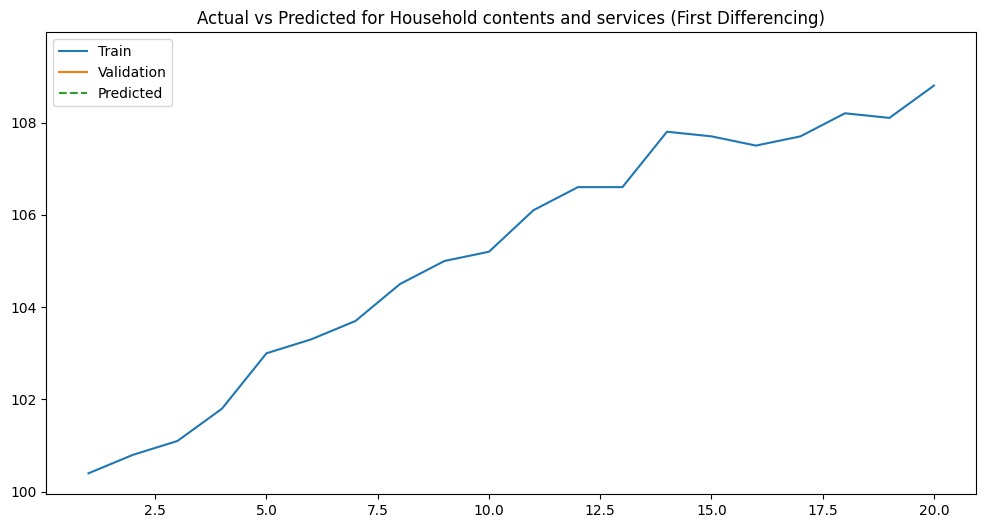

<Figure size 1200x400 with 0 Axes>

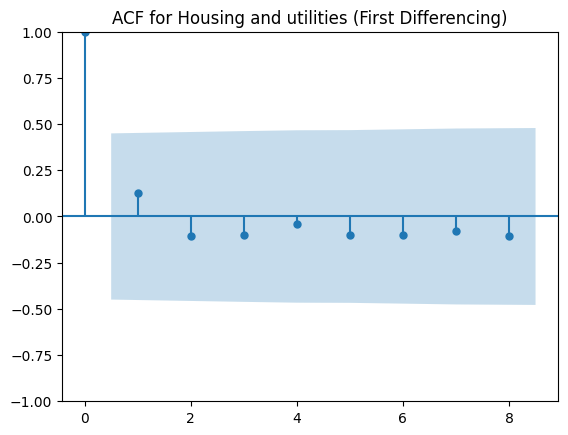

<Figure size 1200x400 with 0 Axes>

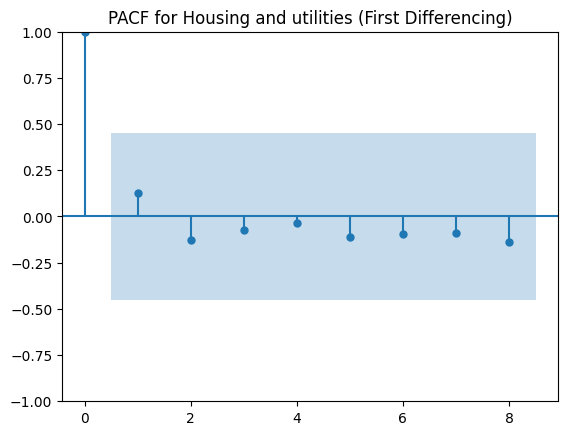

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


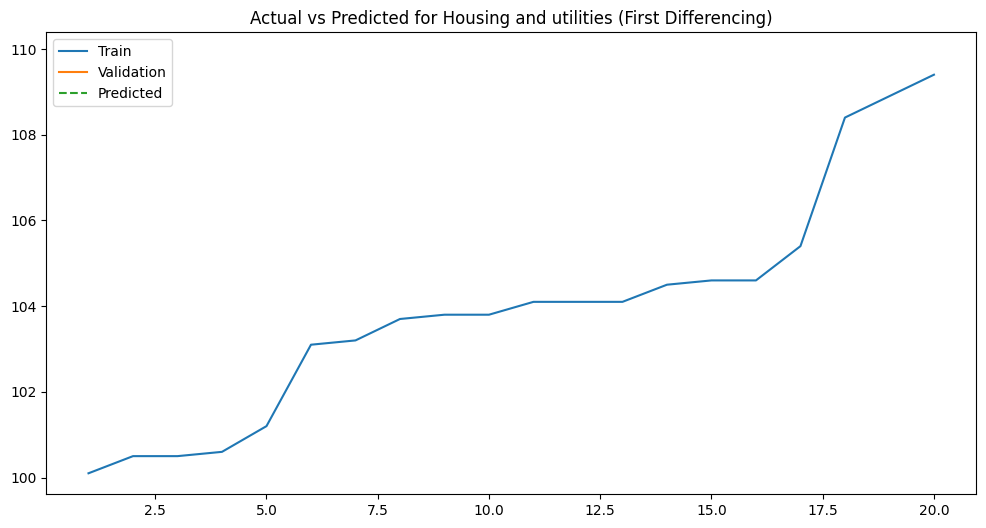

<Figure size 1200x400 with 0 Axes>

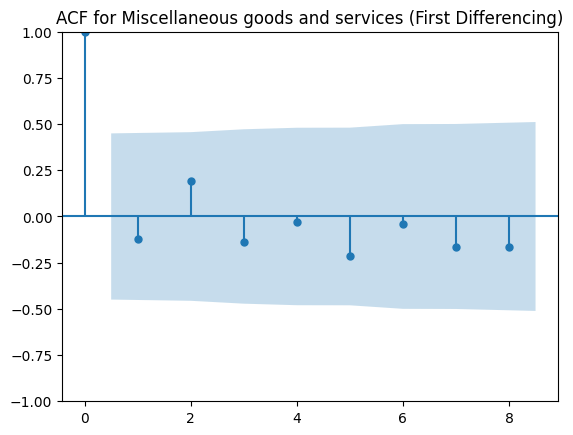

<Figure size 1200x400 with 0 Axes>

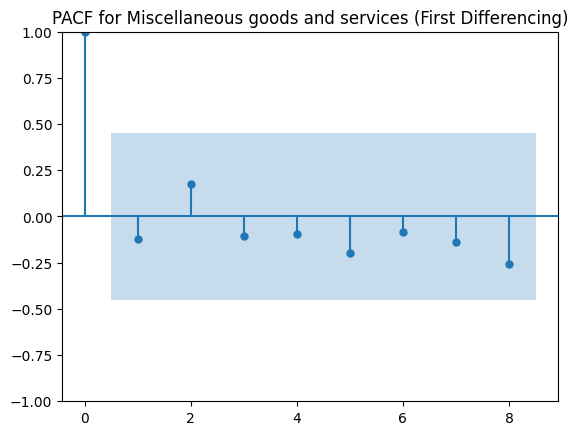

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


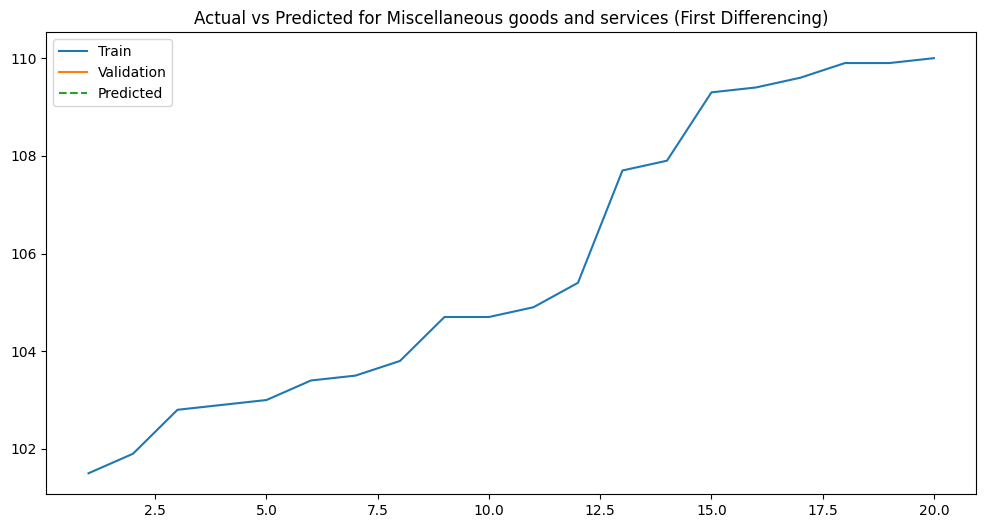

<Figure size 1200x400 with 0 Axes>

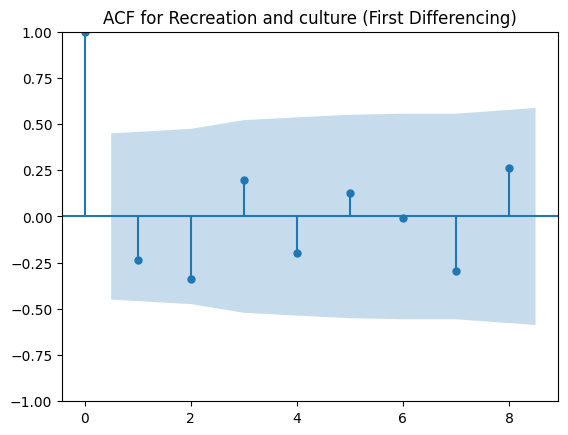

<Figure size 1200x400 with 0 Axes>

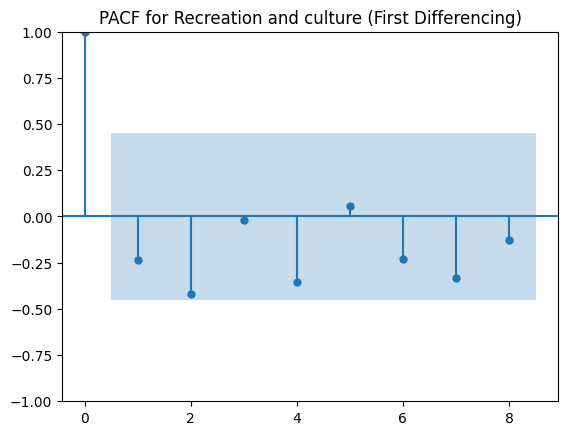

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


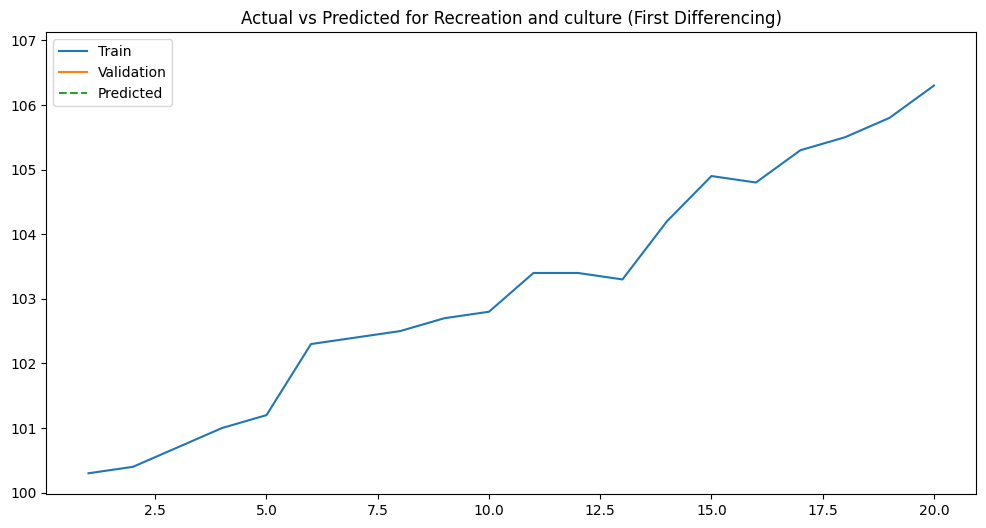

<Figure size 1200x400 with 0 Axes>

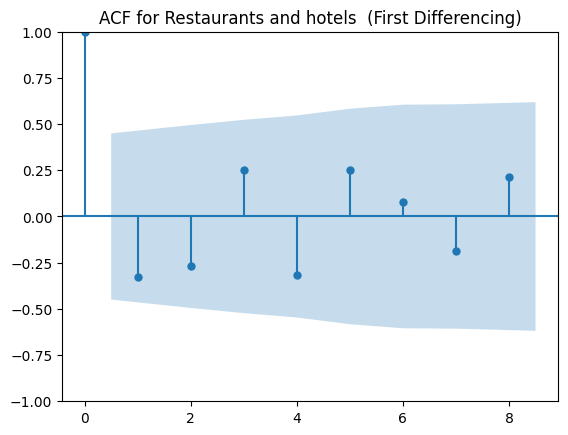

<Figure size 1200x400 with 0 Axes>

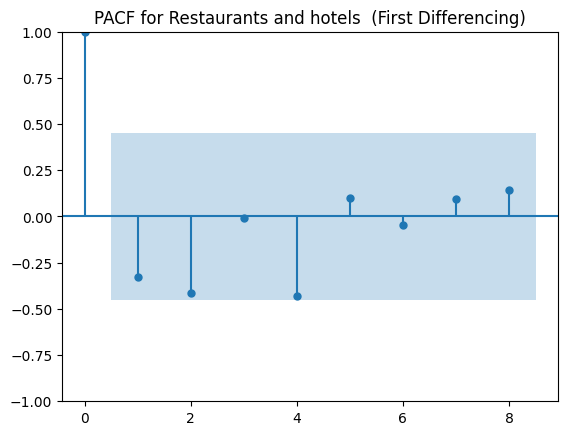

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


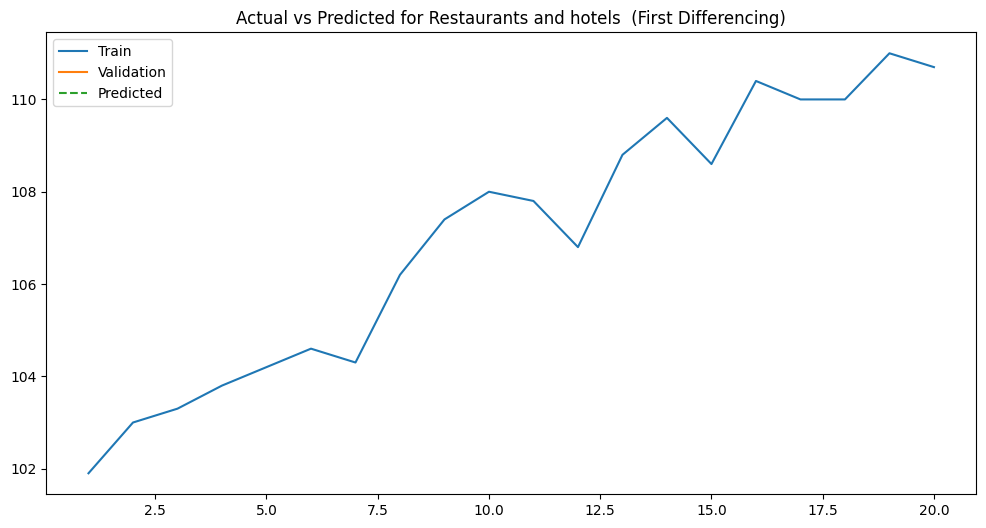

<Figure size 1200x400 with 0 Axes>

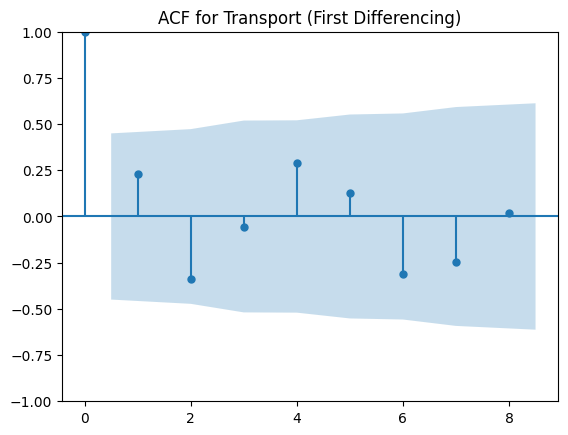

<Figure size 1200x400 with 0 Axes>

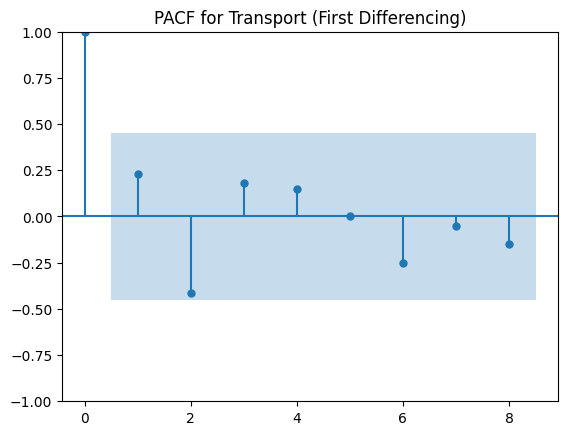

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


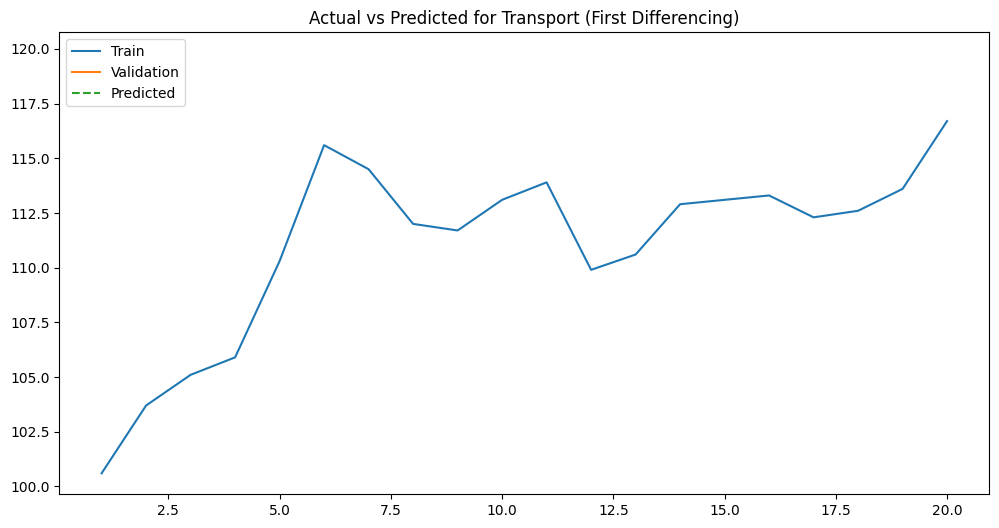

Predictions for Alcoholic beverages and tobacco:
[111.]


Predictions for Clothing and footwear:
[105.]


Predictions for Communication:
[99.5]


Predictions for Education:
[110.4]


Predictions for Food and non-alcoholic beverages:
[119.9]


Predictions for Headline_CPI:
[112.5]


Predictions for Health:
[110.9]


Predictions for Household contents and services:
[109.5]


Predictions for Housing and utilities:
[109.9]


Predictions for Miscellaneous goods and services:
[110.1]


Predictions for Recreation and culture:
[106.8]


Predictions for Restaurants and hotels :
[110.4]


Predictions for Transport:
[119.8]




In [27]:
# Training and validation
X_train = train[features]
y_train = train[target_columns]

X_valid = test[features]
y_valid = test[target_columns]

# List to store rounded predictions for each target column
all_y_pred = []

# ACF and PACF plots
for target_col in target_columns:
    # Plot ACF
    plt.figure(figsize=(12, 4))
    plot_acf(y_train[target_col].diff().dropna(), lags=8, title=f'ACF for {target_col} (First Differencing)')
    plt.show()

    # Plot PACF
    plt.figure(figsize=(12, 4))
    plot_pacf(y_train[target_col].diff().dropna(), lags=8, title=f'PACF for {target_col} (First Differencing)')
    plt.show()

    # Fit SARIMAX model with first differencing
    order = (0, 1, 0)  # Specify the order (p, d, q) of the non-seasonal part
    seasonal_order = (1, 1, 1, 30)  # Specify the order (P, D, Q, s) of the seasonal part

    model = SARIMAX(y_train[target_col].diff().dropna(), order=order, seasonal_order=seasonal_order)
    results = model.fit()

    # Predict on validation set
    y_pred_diff = results.get_forecast(steps=len(X_valid))
    y_pred_mean_diff = y_pred_diff.predicted_mean

    # Invert differencing to get predictions in the original scale
    y_pred_mean = y_train[target_col].iloc[-1] + y_pred_mean_diff.cumsum()

    # Round predictions to 5 decimal points
    y_pred_mean_rounded = np.round(y_pred_mean.values, 5)

    # Append rounded predictions to the list
    all_y_pred.append((target_col, y_pred_mean_rounded))

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(y_train[target_col], label='Train')
    plt.plot(y_valid[target_col], label='Validation')
    plt.plot(y_pred_mean, label='Predicted', linestyle='dashed')
    plt.title(f'Actual vs Predicted for {target_col} (First Differencing)')
    plt.legend()
    plt.show()

# Display the list of rounded predictions
for target_col, y_pred in all_y_pred:
    print(f'Predictions for {target_col}:')
    print(y_pred)
    print('\n')


In [28]:
print("List of All Predictions:")
for y_pred in all_y_pred:
    print(y_pred)

List of All Predictions:
('Alcoholic beverages and tobacco', array([111.]))
('Clothing and footwear', array([105.]))
('Communication', array([99.5]))
('Education', array([110.4]))
('Food and non-alcoholic beverages', array([119.9]))
('Headline_CPI', array([112.5]))
('Health', array([110.9]))
('Household contents and services', array([109.5]))
('Housing and utilities', array([109.9]))
('Miscellaneous goods and services', array([110.1]))
('Recreation and culture', array([106.8]))
('Restaurants and hotels ', array([110.4]))
('Transport', array([119.8]))


In [29]:
rmb_path='/content/drive/MyDrive/RMB FINALE/RMBFINAL.csv'
rmb=pd.read_csv(rmb_path)

In [30]:
def prepsub(y_pred_list: list, target_cols: list, test: pd.DataFrame, prefix: str) -> pd.DataFrame:
    # Combine predictions from multiple target columns into a single DataFrame
    combined_predictions = pd.DataFrame(dict(zip(target_cols, y_pred_list)))

    # Add the 'Month' column from the test set
    combined_predictions['Month'] = test['Month']

    # Set the 'Month' column as the index
    combined_predictions.set_index('Month', inplace=True)

    # Rename columns with the specified prefix and convert to lowercase
    combined_predictions.columns = [f'{prefix}_{col.lower().replace("_", " ").strip()}' for col in combined_predictions.columns]

    # Rename specific column (adjust as needed)
    combined_predictions = combined_predictions.rename(columns={f'{prefix}_headline cpi': f'{prefix}_headline CPI'})

    # Reshape the DataFrame using pd.melt
    submission_df = pd.melt(combined_predictions.reset_index(), id_vars=['Month'], var_name='ID', value_name='value')

    return submission_df[['ID', 'value']]


In [31]:
# Assuming all_y_pred is a list of tuples with target column name and predictions
y_pred_list = [y_pred for _, y_pred in all_y_pred]

# Prepare submission file
submission_df = prepsub(y_pred_list, target_columns, test, 'October')

# Display the submission DataFrame
print(submission_df)


                                          ID  value
0    October_alcoholic beverages and tobacco  111.0
1              October_clothing and footwear  105.0
2                      October_communication   99.5
3                          October_education  110.4
4   October_food and non-alcoholic beverages  119.9
5                       October_headline CPI  112.5
6                             October_health  110.9
7    October_household contents and services  109.5
8              October_housing and utilities  109.9
9   October_miscellaneous goods and services  110.1
10            October_recreation and culture  106.8
11            October_restaurants and hotels  110.4
12                         October_transport  119.8


In [32]:
# Reset the index and drop the original index column
submission_df = submission_df.reset_index(drop=True)
submission_df

ID  value
0    October_alcoholic beverages and tobacco  111.0
1              October_clothing and footwear  105.0
2                      October_communication   99.5
3                          October_education  110.4
4   October_food and non-alcoholic beverages  119.9
5                       October_headline CPI  112.5
6                             October_health  110.9
7    October_household contents and services  109.5
8              October_housing and utilities  109.9
9   October_miscellaneous goods and services  110.1
10            October_recreation and culture  106.8
11            October_restaurants and hotels  110.4
12                         October_transport  119.8

In [33]:
rmb = rmb.iloc[:13]
rmb

ID          value
0    September_alcoholic beverages and tobacco     111.310665
1              September_clothing and footwear     105.060830
2                      September_communication      99.589756
3                          September_education     109.930430
4   September_food and non-alcoholic beverages     118.716123
5                       September_headline CPI     111.413355
6                             September_health     112.393096
7    September_household contents and services     108.392844
8              September_housing and utilities     108.645678
9   September_miscellaneous goods and services     110.932847
10            September_recreation and culture     105.313668
11            September_restaurants and hotels     111.960222
12                         September_transport     114.448539

In [34]:
# Remove leading spaces from column names
rmb.columns = rmb.columns.str.strip()
submission_df.columns = submission_df.columns.str.strip()

# Replace 0 values in 'rmb' with corresponding values from 'oct'
rmb.loc[rmb['value'] == 0, 'value'] = submission_df['value']

# Concatenate the DataFrames
final = pd.concat([rmb, submission_df], ignore_index=True)

# Reset the index
final = final.reset_index(drop=True)
final

ID       value
0    September_alcoholic beverages and tobacco  111.310665
1              September_clothing and footwear  105.060830
2                      September_communication   99.589756
3                          September_education  109.930430
4   September_food and non-alcoholic beverages  118.716123
5                       September_headline CPI  111.413355
6                             September_health  112.393096
7    September_household contents and services  108.392844
8              September_housing and utilities  108.645678
9   September_miscellaneous goods and services  110.932847
10            September_recreation and culture  105.313668
11            September_restaurants and hotels  111.960222
12                         September_transport  114.448539
13     October_alcoholic beverages and tobacco  111.000000
14               October_clothing and footwear  105.000000
15                       October_communication   99.500000
16                           October_education  110.400000
17    October_food and non-alcoholic beverages  119.900000
18                        October_headline CPI  112.500000
19                              October_health  110.900000
20     October_household contents and services  109.500000
21               October_housing and utilities  109.900000
22    October_miscellaneous goods and services  110.100000
23              October_recreation and culture  106.800000
24              October_restaurants and hotels  110.400000
25                           October_transport  119.800000

In [35]:
# Create an empty DataFrame for November
november_df = pd.DataFrame(columns=['ID', 'value'])

# Set the 'Value' column to 0 for all categories
categories = final['ID'].str.split('_', expand=True)[1].unique()
november_df['ID'] = ['November_' + cat for cat in categories]
november_df['value'] = 0

# Concatenate all DataFrames
final_submission = pd.concat([final,november_df], ignore_index=True)
final_submission

ID       value
0    September_alcoholic beverages and tobacco  111.310665
1              September_clothing and footwear  105.060830
2                      September_communication   99.589756
3                          September_education  109.930430
4   September_food and non-alcoholic beverages  118.716123
5                       September_headline CPI  111.413355
6                             September_health  112.393096
7    September_household contents and services  108.392844
8              September_housing and utilities  108.645678
9   September_miscellaneous goods and services  110.932847
10            September_recreation and culture  105.313668
11            September_restaurants and hotels  111.960222
12                         September_transport  114.448539
13     October_alcoholic beverages and tobacco  111.000000
14               October_clothing and footwear  105.000000
15                       October_communication   99.500000
16                           October_education  110.400000
17    October_food and non-alcoholic beverages  119.900000
18                        October_headline CPI  112.500000
19                              October_health  110.900000
20     October_household contents and services  109.500000
21               October_housing and utilities  109.900000
22    October_miscellaneous goods and services  110.100000
23              October_recreation and culture  106.800000
24              October_restaurants and hotels  110.400000
25                           October_transport  119.800000
26    November_alcoholic beverages and tobacco    0.000000
27              November_clothing and footwear    0.000000
28                      November_communication    0.000000
29                          November_education    0.000000
30   November_food and non-alcoholic beverages    0.000000
31                       November_headline CPI    0.000000
32                             November_health    0.000000
33    November_household contents and services    0.000000
34              November_housing and utilities    0.000000
35   November_miscellaneous goods and services    0.000000
36             November_recreation and culture    0.000000
37             November_restaurants and hotels    0.000000
38                          November_transport    0.000000

In [36]:
final_submission.to_csv('haya.csv', index=False)

In [37]:
from google.colab import files

# Save the DataFrame to a CSV file
submission_df.to_csv('haha.csv', index=False)

# Generate a download link
files.download('haya.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>